# P-175 Group no.5


# Forecast Gold Prices

## Business Objective:


### Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.
### This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from math import sqrt
import statsmodels.api as smf
import pandas_profiling as pp
import matplotlib.pyplot as plt

from pandas.plotting import lag_plot
import statsmodels.formula.api as sm

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt 


import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Gold_data.csv',parse_dates=True)
data.head()

date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75

# Exploratory Data Analysis

## In Time Series Analysis we will analyze to find out the below stuff

- Missing values
- Duplicated values
- Outlier Detection
- Feature Scaling
- Feature Extraction
- Correlation
- Skewness Removal
- Data Insights
- Stationarity Test
- Autocorrelation Function
- Partial Autocorrelation Function
- Lag plots
- Normal Distribution Analysis
- Relationshop between independent and dependent feature (Price and date)

## Descriptive Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [5]:
data.describe()

price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000

- As we can see,in the dataset the **minimum** gold price is 2252 and **maximum** is double i.e. 4966. 
- Average price is 3284.
- The diff between maximum and 75% is not out of bound hence we can say that there is no outlier present in the dataset.

In [6]:
data.isnull().sum()

date     0
price    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

date     0
price    0
dtype: int64

-There is no null,duplicated and missing values in dataset.

In [9]:
print("Year starts from {} to {}".format(data.date[0],data.date.iloc[-1]))


Year starts from 2016-01-01 to 2021-12-21


- The data is from 2016 to 2021.
- 5 years gold price.

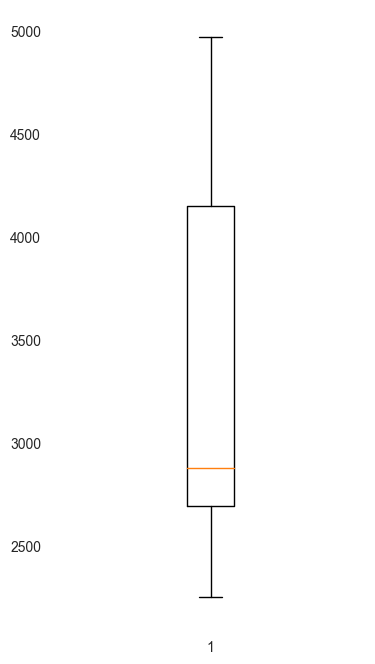

In [10]:
plt.figure(figsize=(4,8))
plt.boxplot(data.price)
plt.show()

- ## No outlier present in dataset

# Univariate Analysis
### Histogram PLot

In [11]:
df=data.copy()
df['date']=pd.to_datetime(df.date)#,format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


<AxesSubplot: >

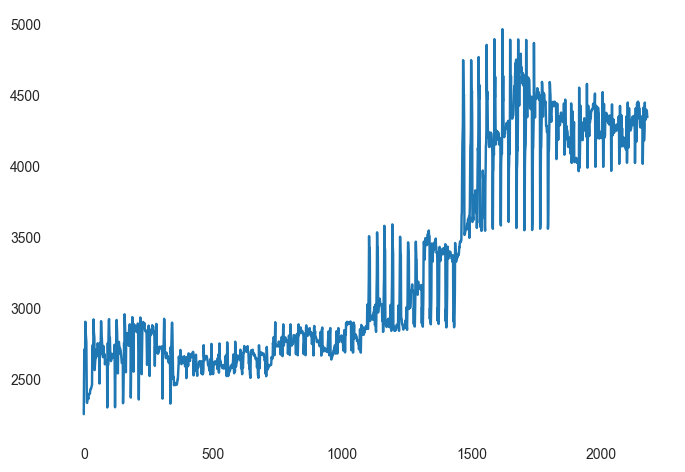

In [12]:
df.price.plot()

In [13]:
# month extraction
df['Month']=df.date.dt.strftime('%b')
# year extraction
df['Year']=df.date.dt.strftime('%Y')
df['quarter'] = df['date'].dt.quarter
df['dayno']=pd.to_datetime(df.date).dt.strftime('%d')
df['day_of_week'] = df['date'].dt.day_name()

df[['Month']]=df[['Month']].astype('str')
df[['Year']]=df[['Year']].astype(int)
df[['quarter']]=df[['quarter']].astype(int)
df[['day_of_week']]=df[['day_of_week']].astype(str)
df[['dayno']]=df[['dayno']].astype(int)

df.head(5)

date    price Month  Year  quarter  dayno day_of_week
0 2016-01-01  2252.60   Jan  2016        1      1      Friday
1 2016-01-02  2454.50   Jan  2016        1      2    Saturday
2 2016-01-03  2708.10   Jan  2016        1      3      Sunday
3 2016-01-04  2577.80   Jan  2016        1      4      Monday
4 2016-01-05  2597.75   Jan  2016        1      5     Tuesday

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2182 non-null   datetime64[ns]
 1   price        2182 non-null   float64       
 2   Month        2182 non-null   object        
 3   Year         2182 non-null   int32         
 4   quarter      2182 non-null   int32         
 5   dayno        2182 non-null   int32         
 6   day_of_week  2182 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 93.9+ KB


In [15]:
df['change']=df['price'].pct_change() 
df['Difference']=df['price'].diff() 
df.head()

date    price Month  Year  quarter  dayno day_of_week    change  \
0 2016-01-01  2252.60   Jan  2016        1      1      Friday       NaN   
1 2016-01-02  2454.50   Jan  2016        1      2    Saturday  0.089630   
2 2016-01-03  2708.10   Jan  2016        1      3      Sunday  0.103320   
3 2016-01-04  2577.80   Jan  2016        1      4      Monday -0.048115   
4 2016-01-05  2597.75   Jan  2016        1      5     Tuesday  0.007739   

   Difference  
0         NaN  
1      201.90  
2      253.60  
3     -130.30  
4       19.95

In [16]:
df[['price','change','Difference']].describe()

price       change   Difference
count  2182.000000  2181.000000  2181.000000
mean   3284.450046     0.000805     0.960064
std     719.564434     0.031395   113.947909
min    2252.600000    -0.249826 -1187.100000
25%    2697.020000    -0.005752   -18.300000
50%    2879.800000     0.000000     0.000000
75%    4147.325000     0.006973    22.800000
max    4966.300000     0.170527   687.800000

In [17]:
# To find information of maximum price
df[df['price']==4966.300000]

date   price Month  Year  quarter  dayno day_of_week    change  \
1620 2020-06-08  4966.3   Jun  2020        2      8      Monday  0.160757   

      Difference  
1620       687.8

In [18]:
# To find information of minimum price
df[df['price']==2299.800000]

date   price Month  Year  quarter  dayno day_of_week    change  \
91 2016-04-01  2299.8   Apr  2016        2      1      Friday -0.125352   

    Difference  
91      -329.6

**From the above we can say that the highest Gold price on thw 8th Jun 2020 and the lowest price on the 1st April 2016.**

In [21]:
df_year = df[['price','Year']].groupby(by='Year').mean().reset_index()
df_year

Year        price
0  2016  2690.614162
1  2017  2626.676484
2  2018  2781.938082
3  2019  3150.210685
4  2020  4216.378689
5  2021  4266.871549

**Here we can see the average of every year**

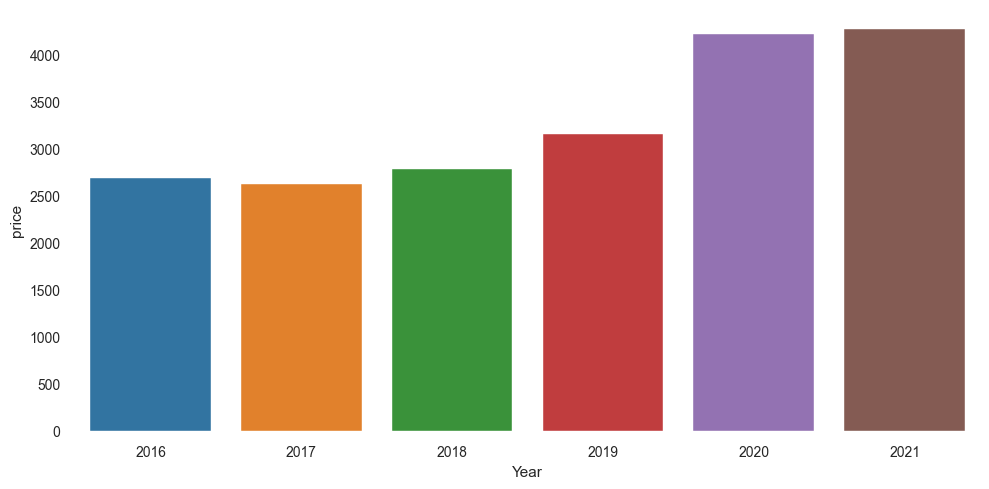

In [22]:
sns.catplot(x='Year',y='price',data=df_year,kind='bar',aspect=2)

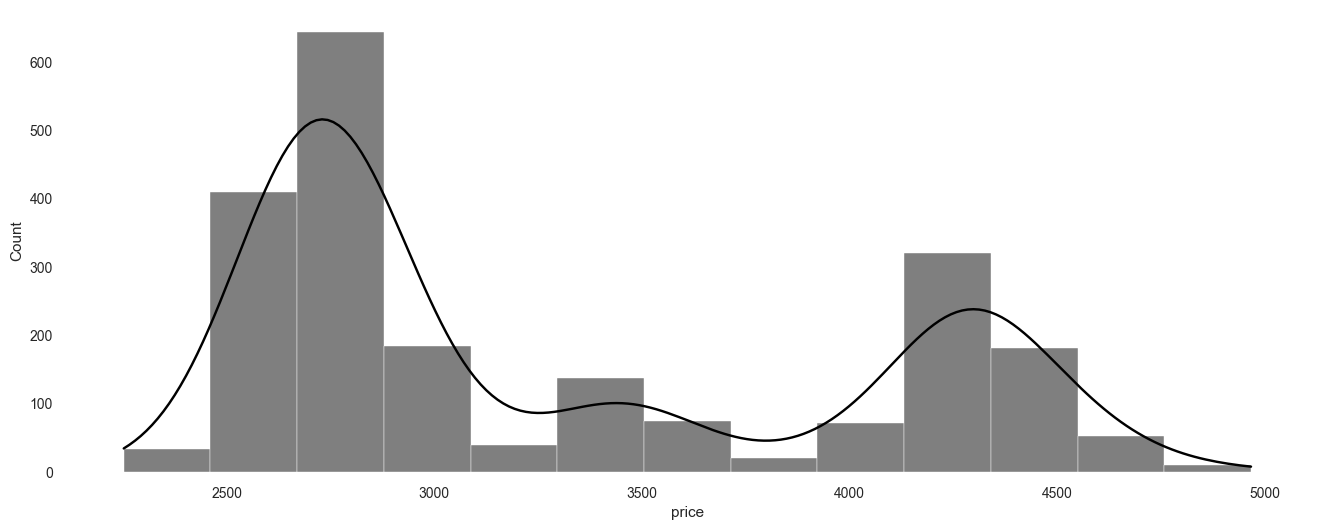

In [23]:
_, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=df,x='price',kde=True,color='black')
plt.show()

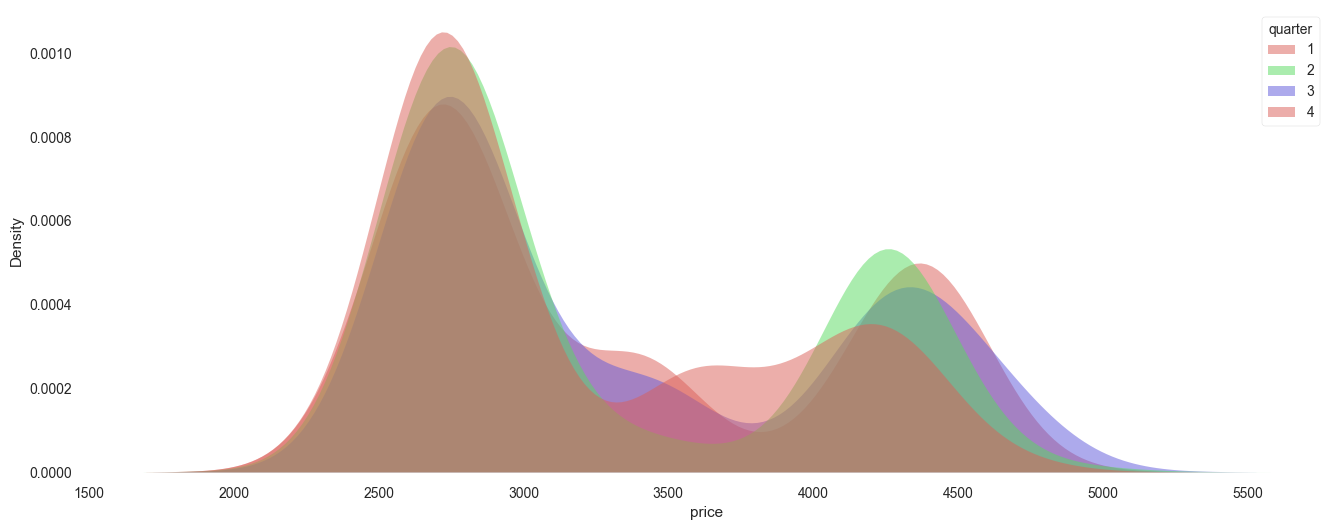

In [24]:
_, ax = plt.subplots(figsize=(16,6))
sns.kdeplot(ax=ax,data=df, x="price", hue="quarter",fill=True, common_norm=False, palette="hls", alpha=.5, linewidth=0,)
plt.show()

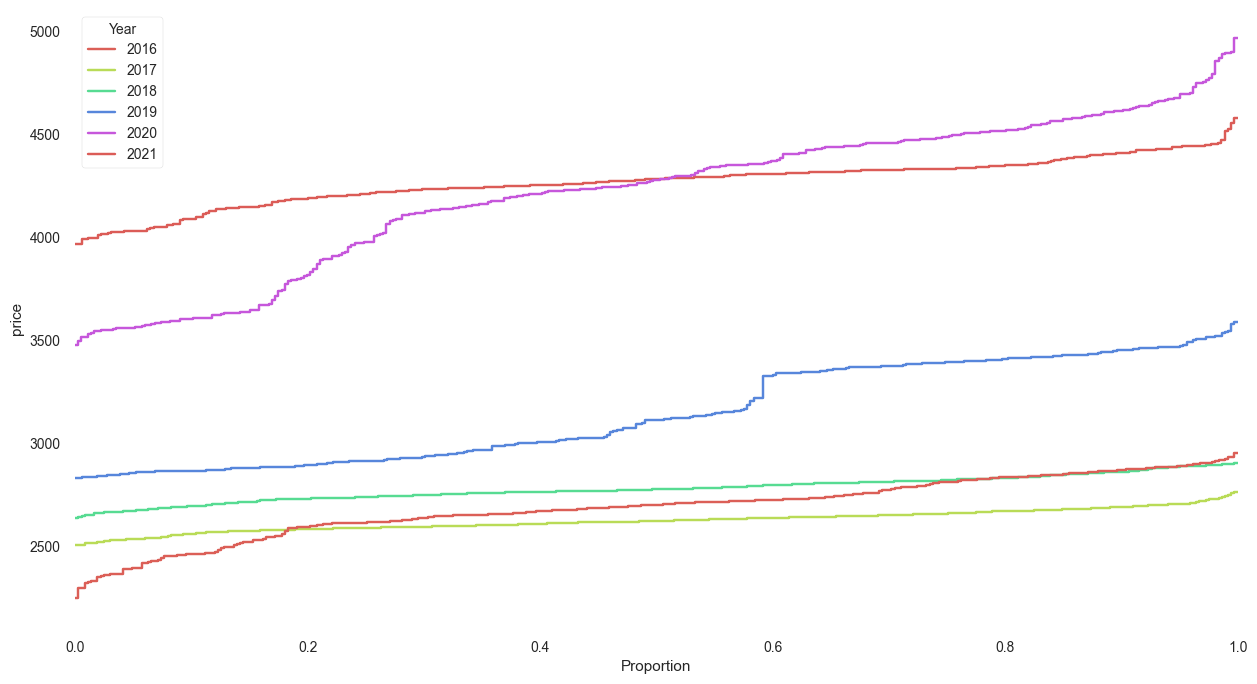

In [25]:
_, ax = plt.subplots(figsize=(15,8))
sns.ecdfplot(data=df, y="price",ax=ax,hue='Year',palette="hls")
plt.show()

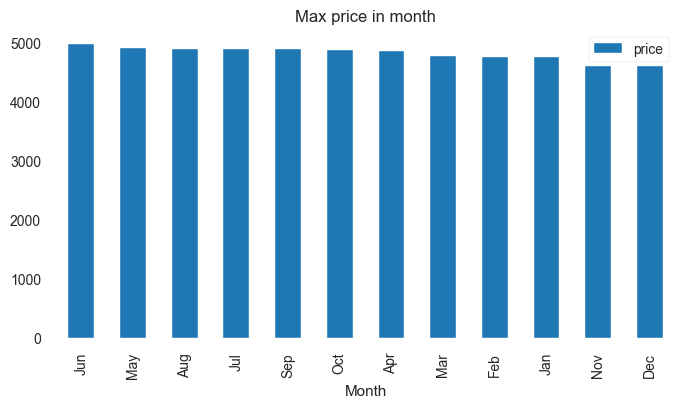

In [29]:
_, ax = plt.subplots(figsize=(8,4))
dfm=df.groupby(['Month']).max().sort_values(by='price',ascending=False).plot.bar(y='price',ax=ax,title='Max price in month')

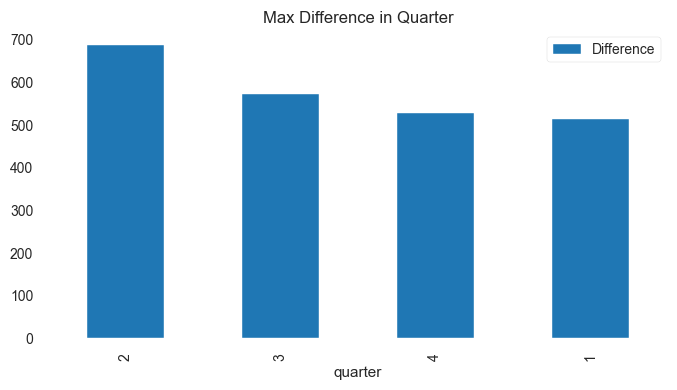

In [31]:
_, ax = plt.subplots(figsize=(8,4))
dfq=df.groupby(['quarter']).max().sort_values(by='price',ascending=False).plot.bar(y='Difference',ax=ax,title='Max Difference in Quarter')

In [33]:
dfdate=df[['date','price']]
dfdate.set_index('date', inplace=True)

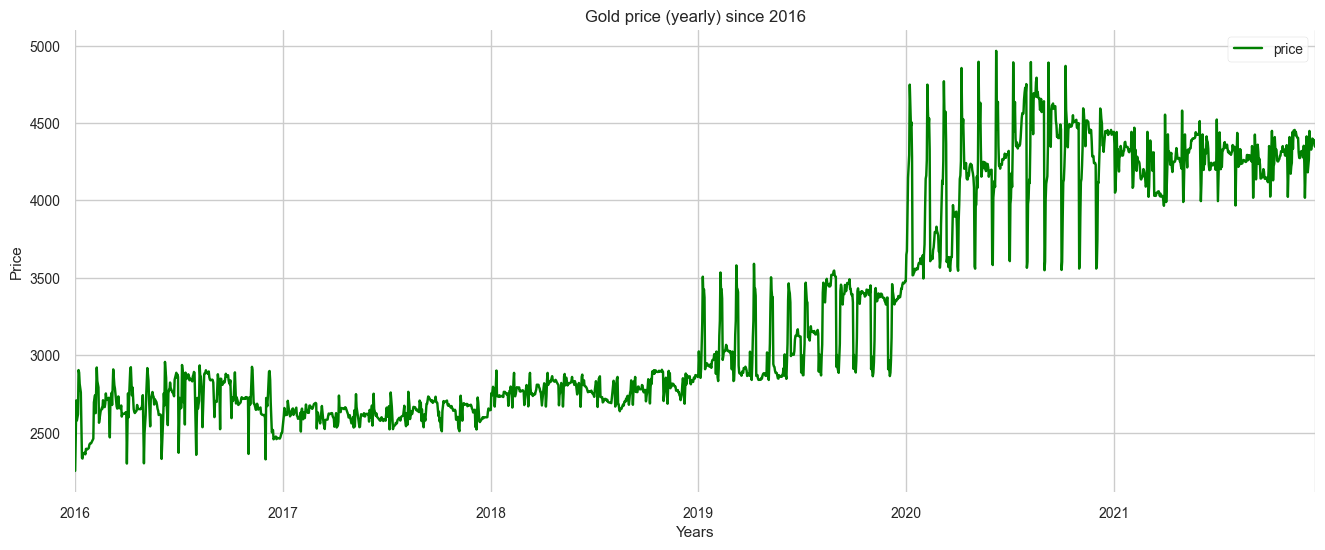

In [35]:
#data.plot(kind ='line',x = 'date', y = 'price', figsize = (16,8), marker = 'o')
dfdate.plot(figsize=(16,6),color='green')
plt.title("Gold price (yearly) since 2016")
plt.xlabel("Years")
plt.ylabel("Price")
plt.grid();

In [37]:
dfqd=df[['quarter','Difference']]
dfqd.set_index('quarter',inplace=True)

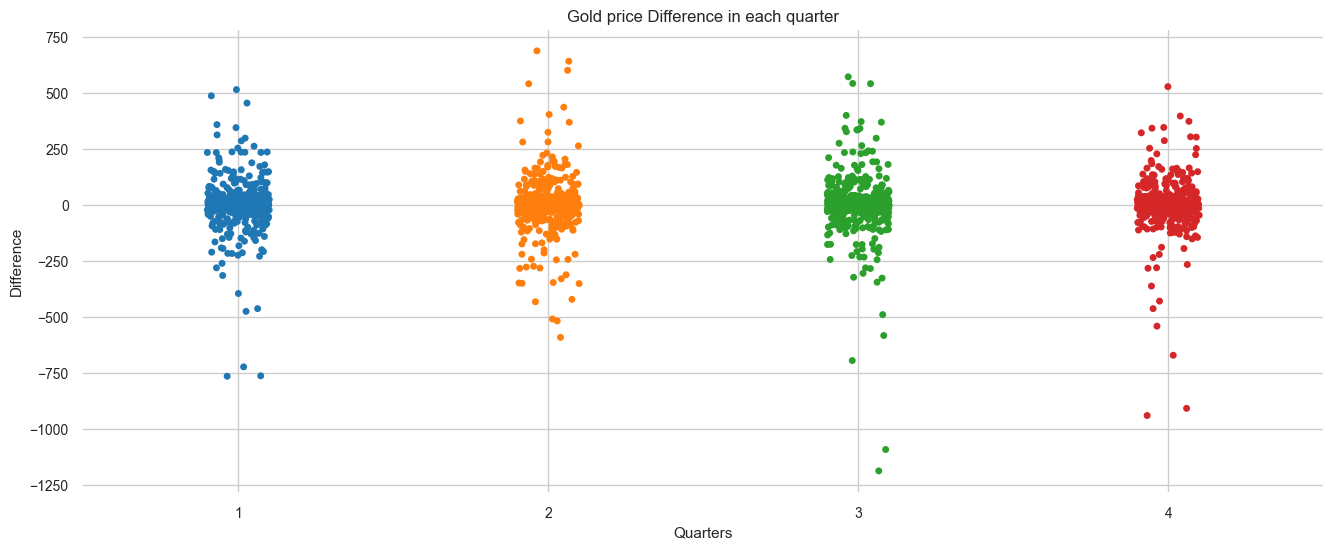

In [38]:
_, ax = plt.subplots(figsize=(16,6))
sns.stripplot(x = dfqd.index,y = dfqd.Difference,ax=ax)
plt.title("Gold price Difference in each quarter")
plt.xlabel("Quarters")
plt.ylabel("Difference")
plt.grid();

### For 2020 year 

In [39]:
df2020=df[['Month','price','Year','dayno']]
df2020=df2020[df2020['Year']==2020]
df2020=df2020.drop('Year',axis=1)
df2020.set_index('Month',inplace=True)

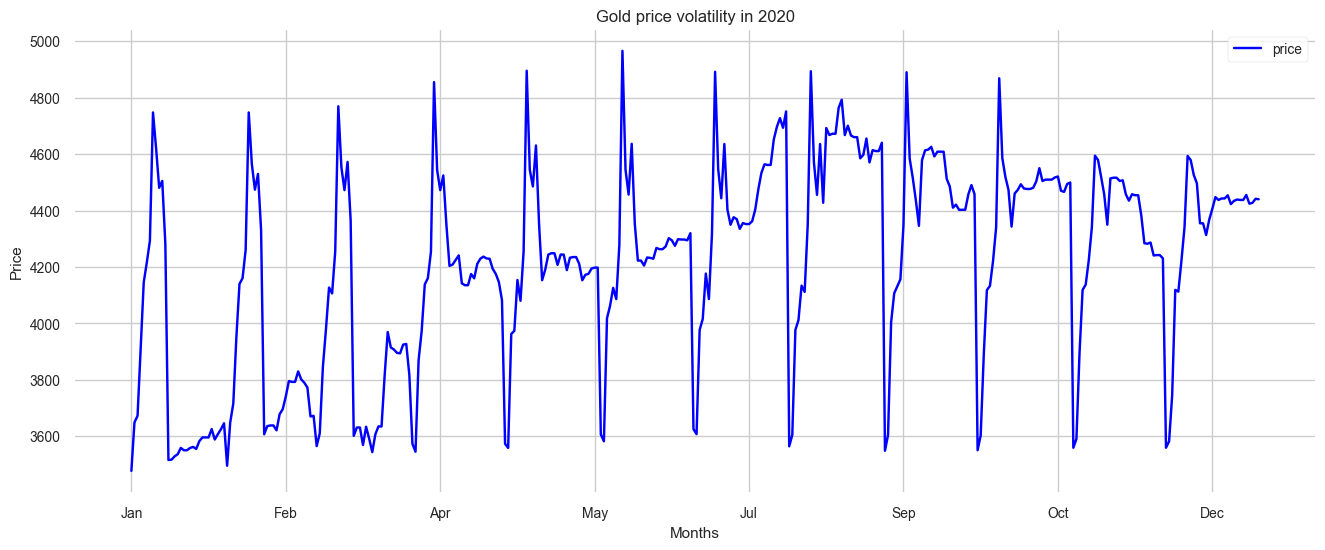

In [40]:
df2020[['price']].plot(figsize=(16,6),color='blue')
plt.title("Gold price volatility in 2020")
plt.xlabel("Months")
plt.ylabel("Price")
plt.grid();

### For 2020 January month

In [41]:
df2020_jan=df2020[df2020.index=='Jan']
df2020_jan.set_index('dayno',inplace=True)

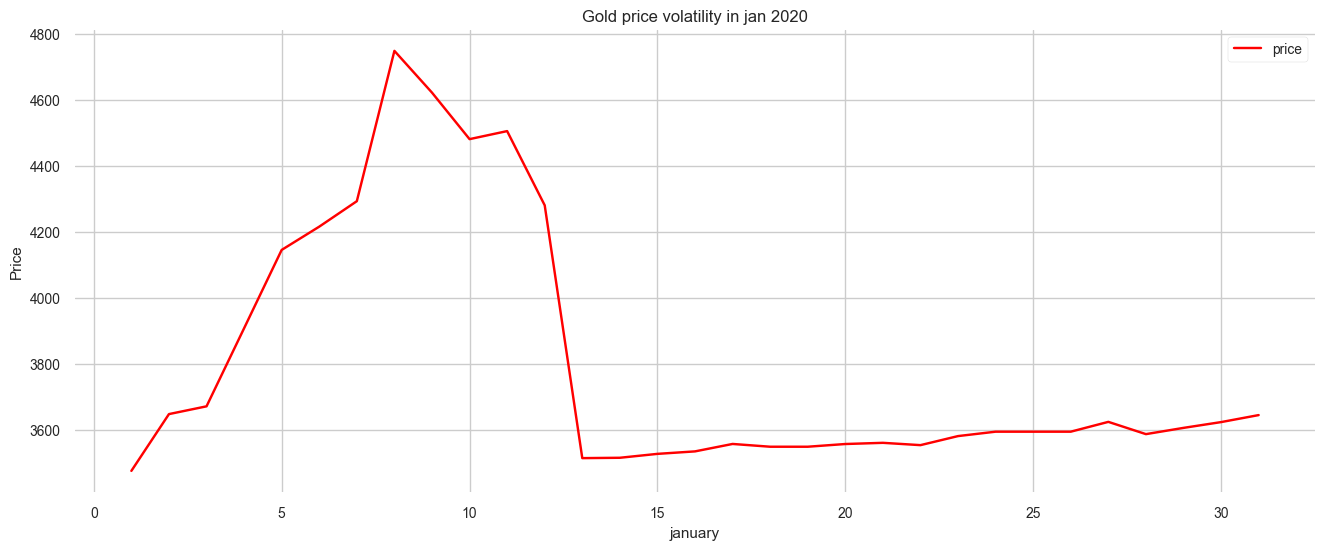

In [42]:
df2020_jan[['price']].plot(figsize=(16,6),color='red')
plt.title("Gold price volatility in jan 2020")
plt.xlabel("january")
plt.ylabel("Price")
plt.grid();

In [43]:
dfmonths=df.groupby('Month')[['price','Difference']].std()
dfmonths=dfmonths.reset_index()

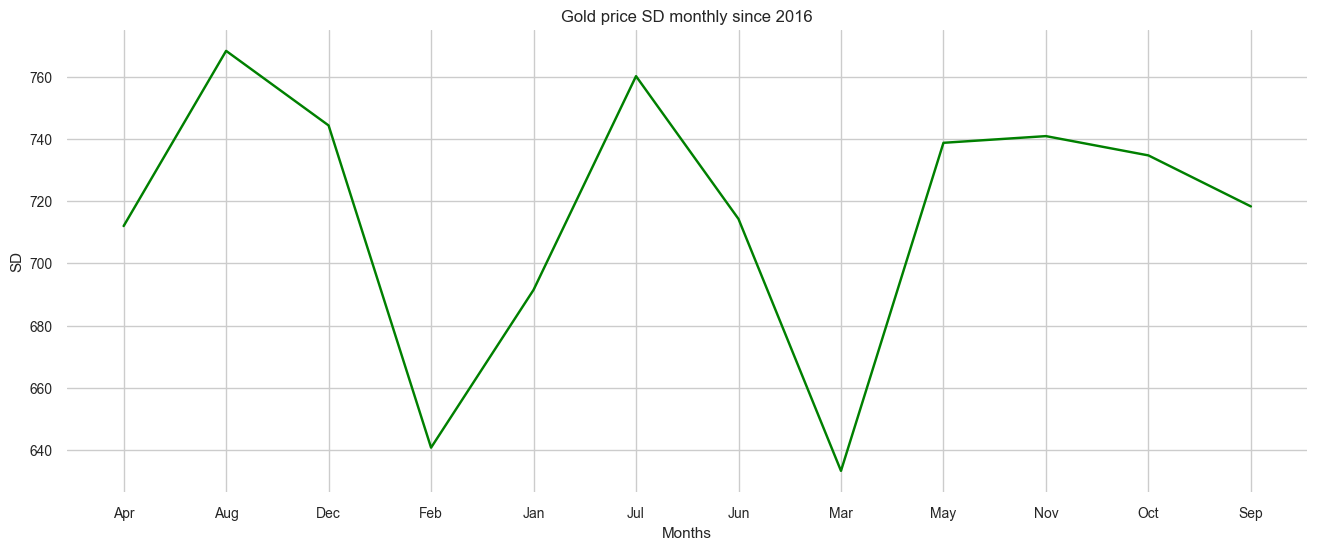

In [44]:
_, ax = plt.subplots(figsize=(16,6))
sns.lineplot(x ='Month',y='price',data=dfmonths,ax=ax,color='green')
plt.title("Gold price SD monthly since 2016")
plt.xlabel("Months")
plt.ylabel("SD")
plt.grid();

<AxesSubplot: xlabel='Year', ylabel='price'>

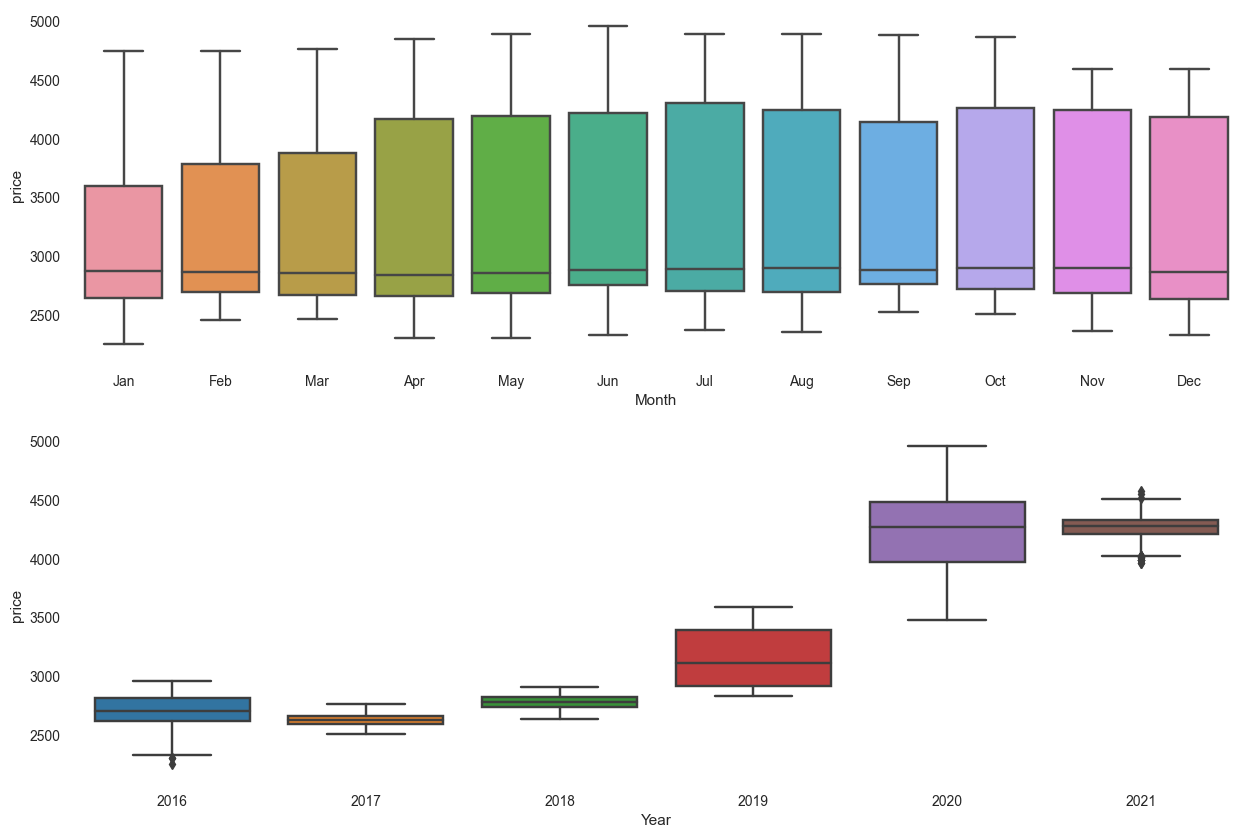

In [46]:
# Box Plot of each year month intervals
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.boxplot(x='Month',y="price",data=df)
plt.subplot(212)
sns.boxplot(x='Year',y="price",data=df)


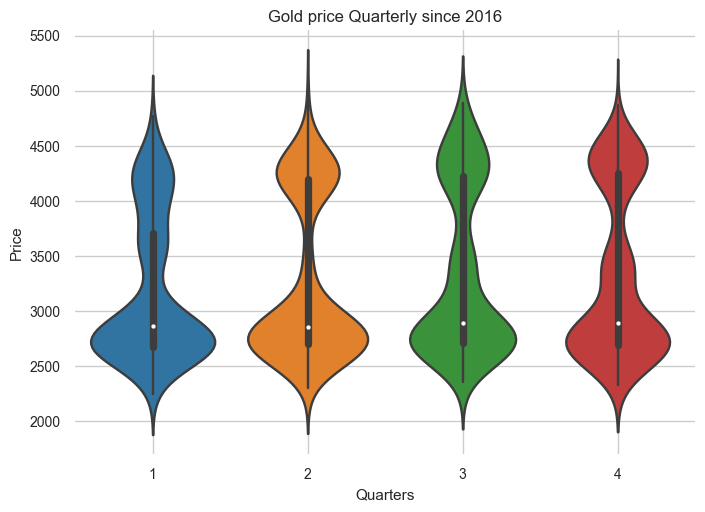

In [47]:
sns.violinplot(x='quarter',y="price",data=df)
plt.title("Gold price Quarterly since 2016")
plt.xlabel("Quarters")
plt.ylabel("Price")
plt.grid();

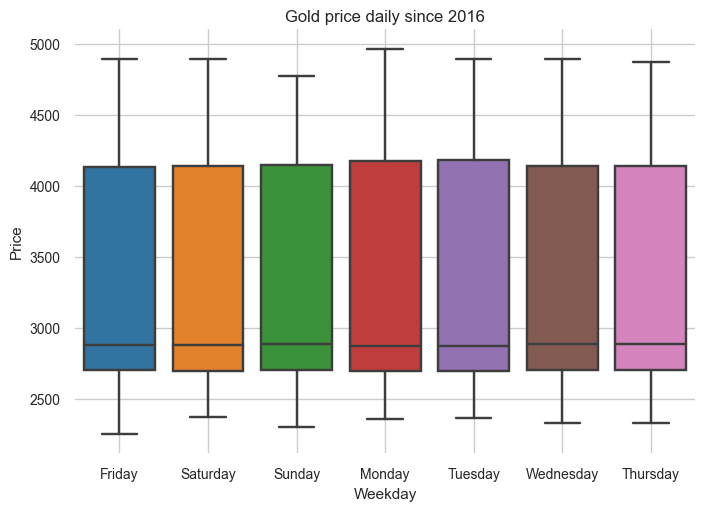

In [48]:
sns.boxplot(x='day_of_week',y="price",data=df)
plt.title("Gold price daily since 2016")
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.grid();

In [50]:
dfd=df[['dayno','price']]
dfd.set_index('dayno',inplace=True)

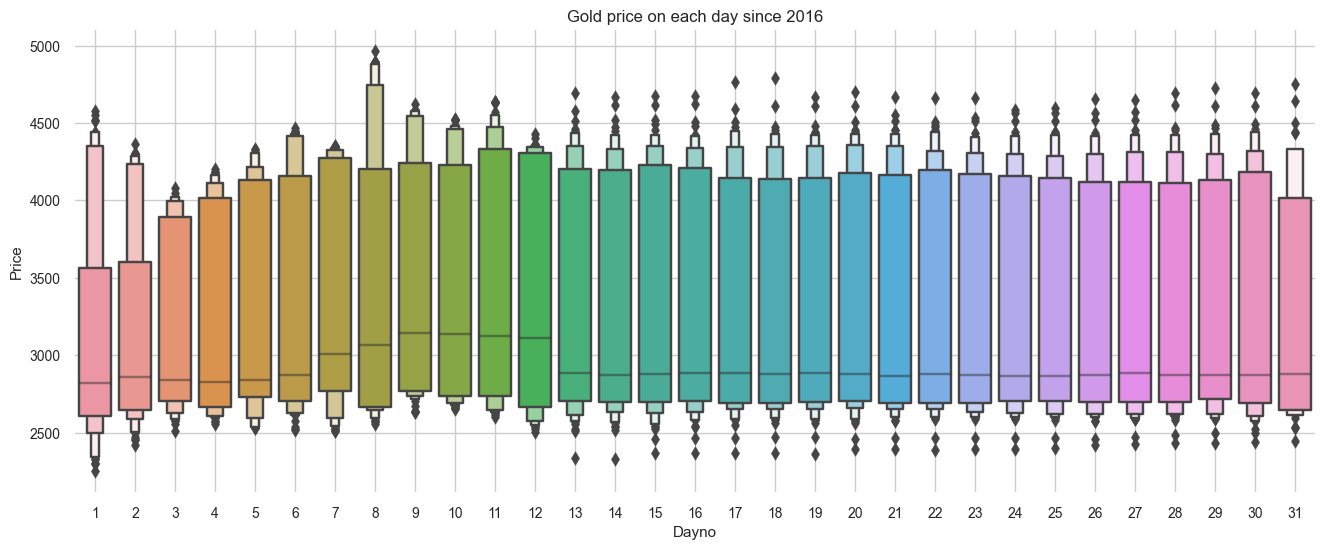

In [52]:
_, ax = plt.subplots(figsize=(16,6))
sns.boxenplot(x = dfd.index,y = dfd.price,ax=ax)
plt.title("Gold price on each day since 2016")
plt.xlabel("Dayno")
plt.ylabel("Price")
plt.grid();

In [53]:
dfs=df[['Difference','price','change']]
dfs=dfs.iloc[1:]
dfs

Difference    price    change
1         201.90  2454.50  0.089630
2         253.60  2708.10  0.103320
3        -130.30  2577.80 -0.048115
4          19.95  2597.75  0.007739
5          19.95  2617.70  0.007680
...          ...      ...       ...
2177       -5.40  4394.40 -0.001227
2178       -4.90  4389.50 -0.001115
2179        0.00  4389.50  0.000000
2180      -35.40  4354.10 -0.008065
2181       -7.60  4346.50 -0.001745

[2181 rows x 3 columns]

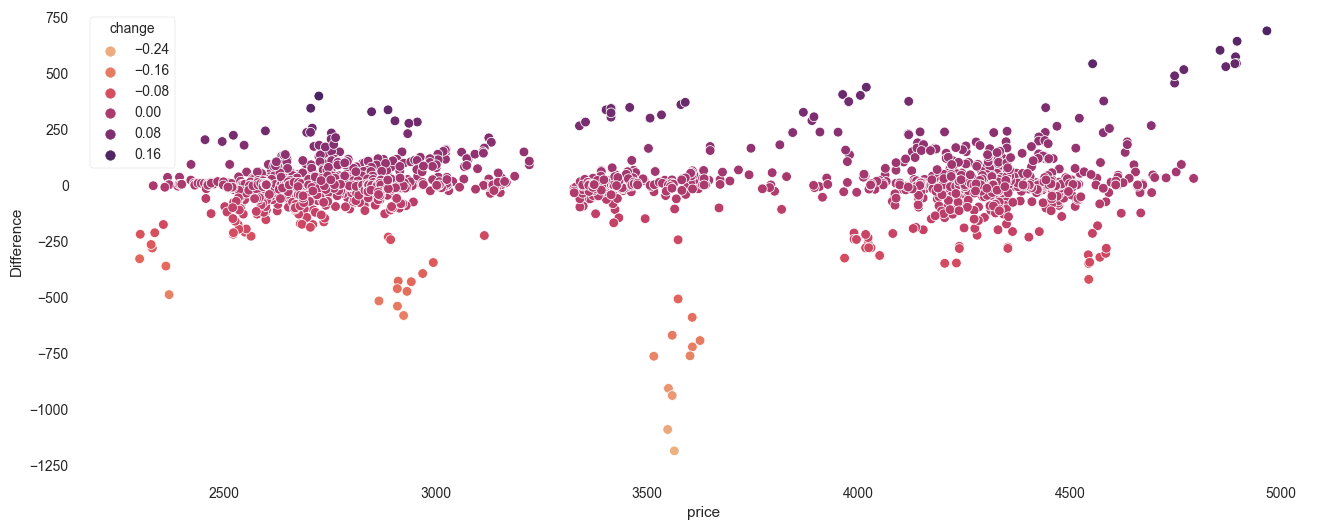

In [54]:
_, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='price',y='Difference',hue='change',palette="flare",data=dfs,ax=ax)
plt.show()

In [56]:
df.head()

date    price Month  Year  quarter  dayno day_of_week    change  \
0 2016-01-01  2252.60   Jan  2016        1      1      Friday       NaN   
1 2016-01-02  2454.50   Jan  2016        1      2    Saturday  0.089630   
2 2016-01-03  2708.10   Jan  2016        1      3      Sunday  0.103320   
3 2016-01-04  2577.80   Jan  2016        1      4      Monday -0.048115   
4 2016-01-05  2597.75   Jan  2016        1      5     Tuesday  0.007739   

   Difference  
0         NaN  
1      201.90  
2      253.60  
3     -130.30  
4       19.95

<AxesSubplot: xlabel='Month', ylabel='Year'>

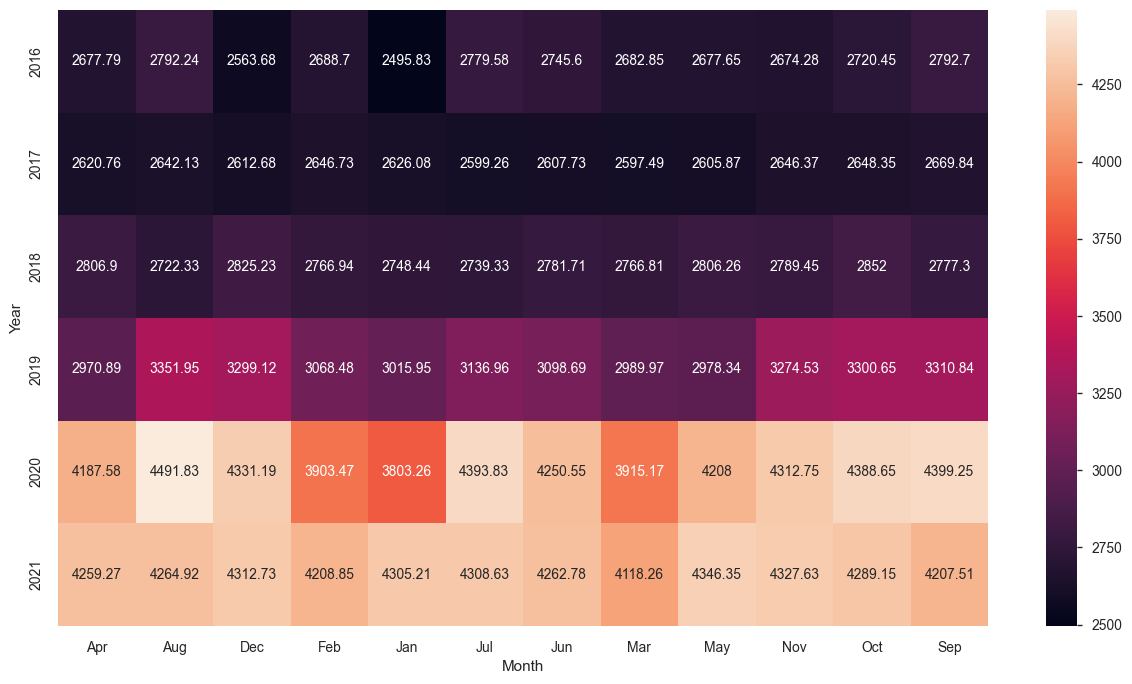

In [49]:
# Heatmap
plt.figure(figsize=(15,8))
y_m=pd.pivot_table(data=df,values='price',index='Year',columns='Month',aggfunc="mean",fill_value=0)
sns.heatmap(y_m,annot=True,fmt='g')

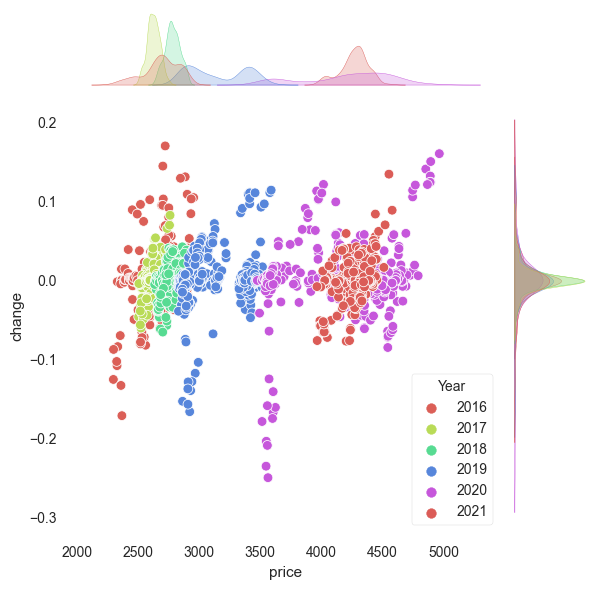

In [57]:
sns.jointplot(data=df, x="price", y="change", hue="Year",palette="hls")
plt.show()

<AxesSubplot: xlabel='Month', ylabel='price'>

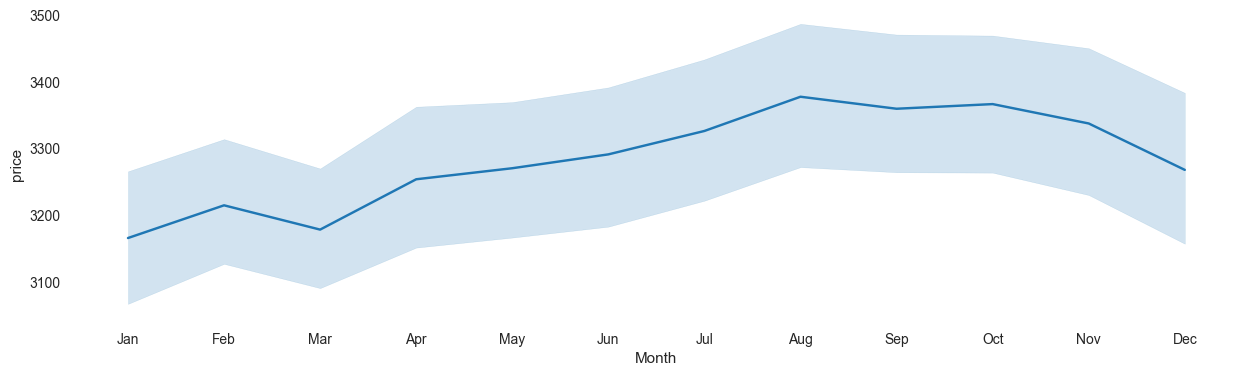

In [58]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Month',y="price",data=df)

<AxesSubplot: xlabel='Year', ylabel='price'>

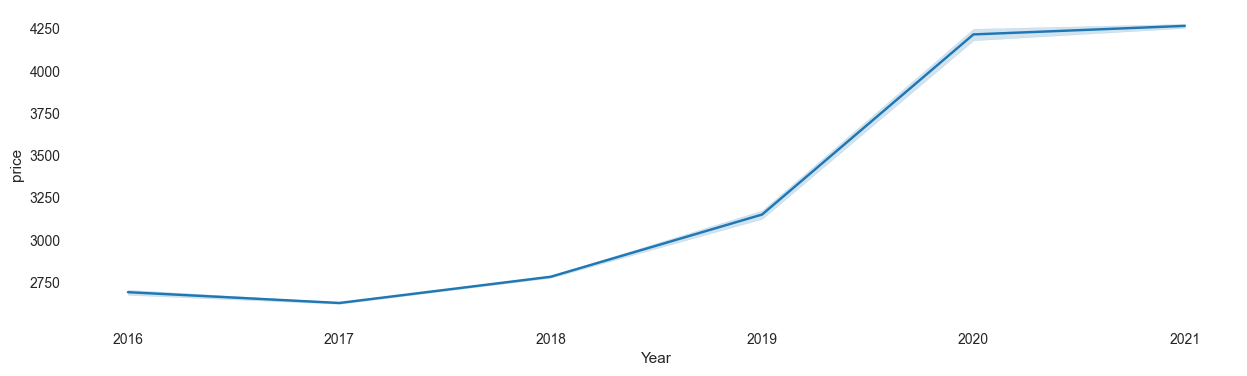

In [59]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Year',y="price",data=df)

<AxesSubplot: xlabel='quarter', ylabel='price'>

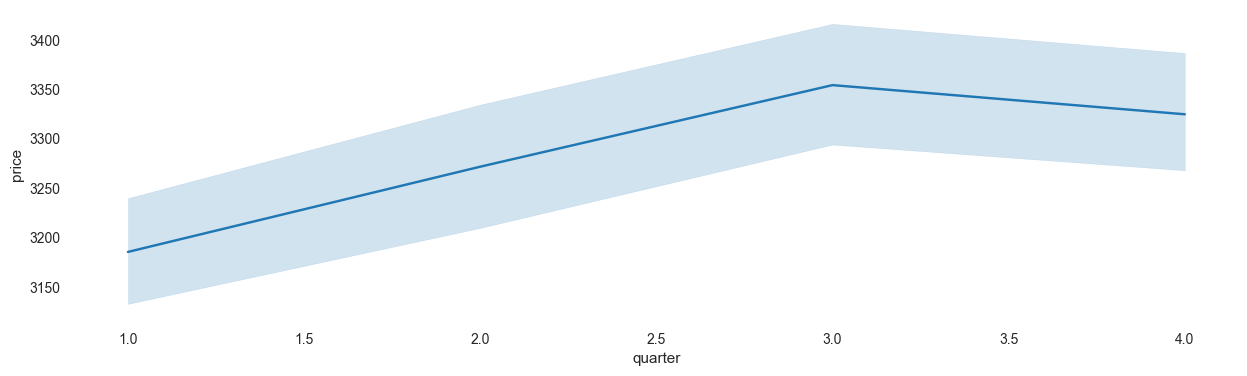

In [60]:
plt.figure(figsize=(15,4))
sns.lineplot(x='quarter',y="price",data=df)

<AxesSubplot: xlabel='day_of_week', ylabel='price'>

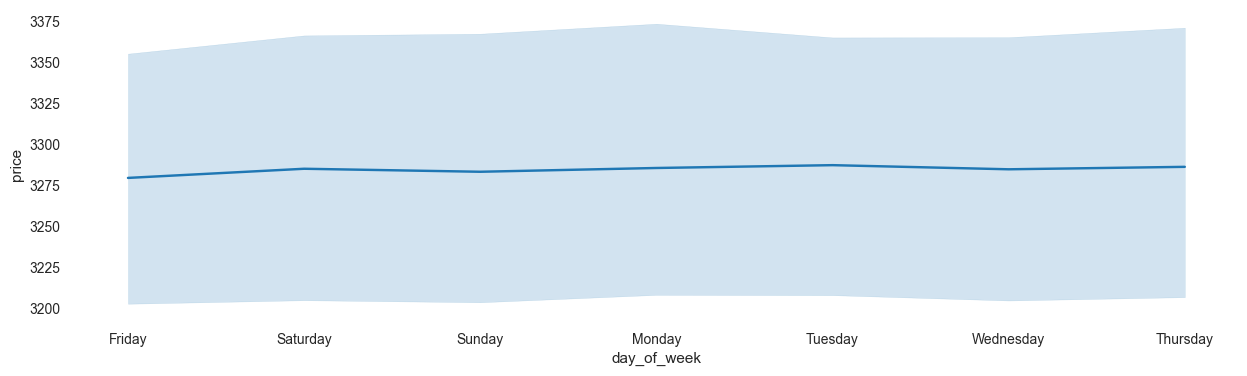

In [61]:
plt.figure(figsize=(15,4))
sns.lineplot(x='day_of_week',y="price",data=df)

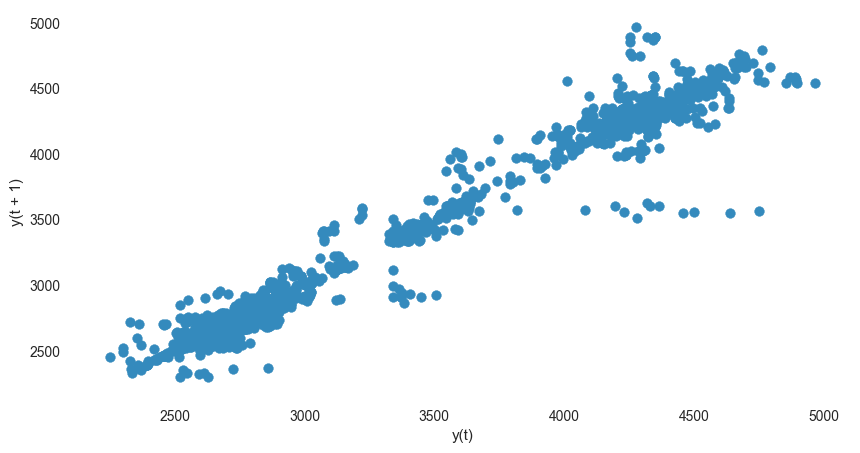

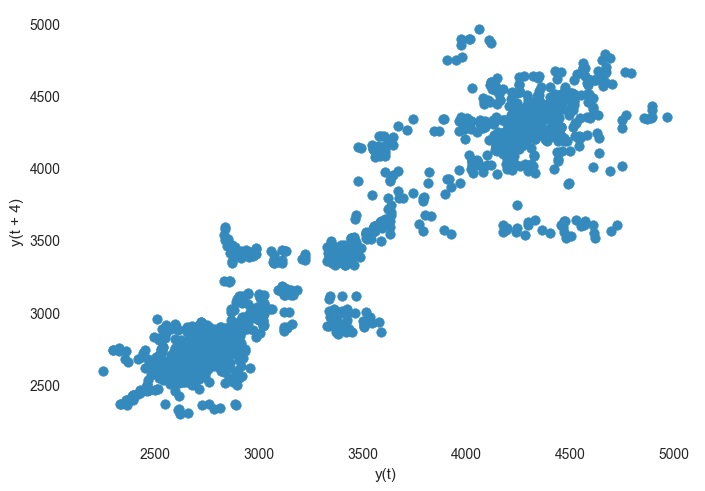

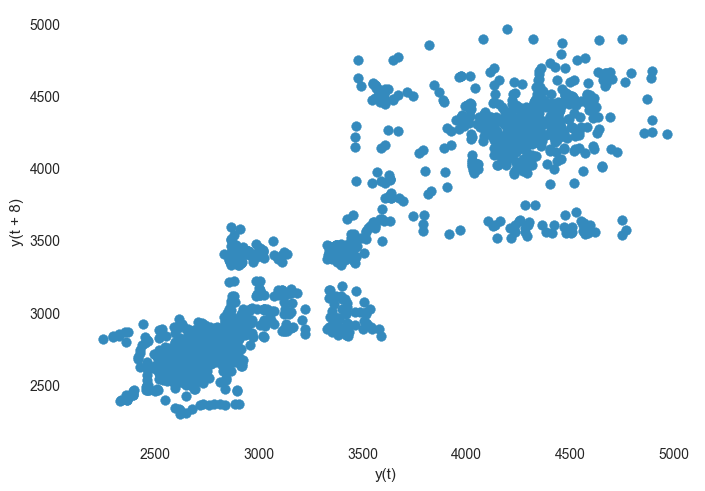

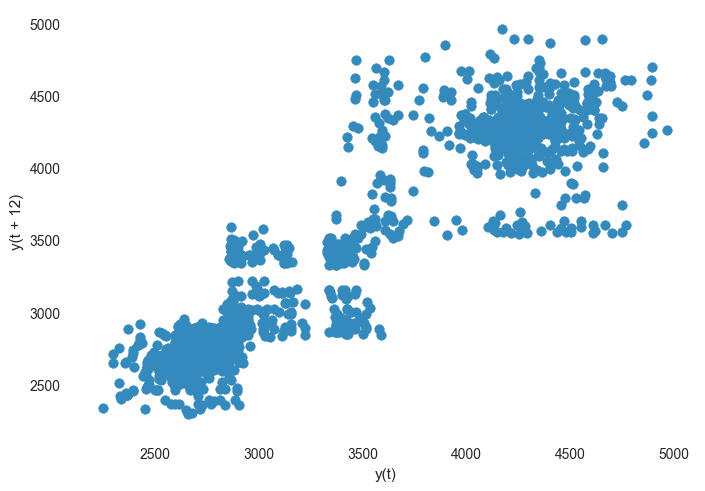

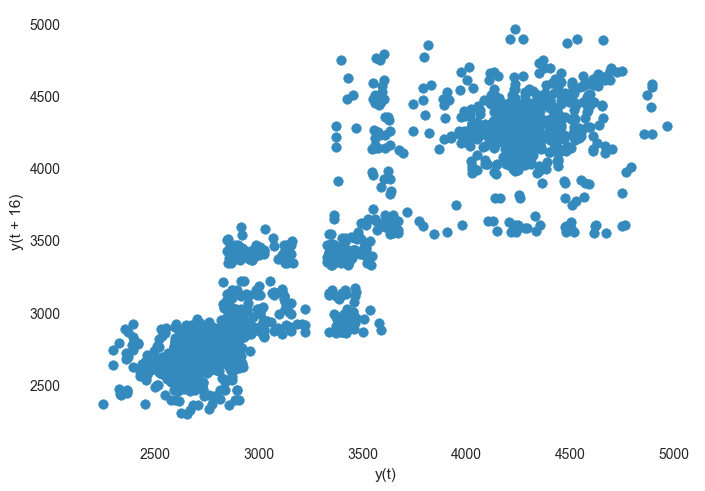

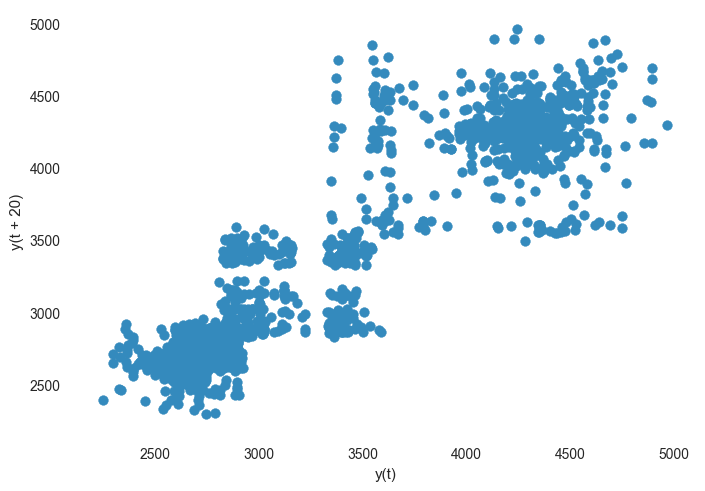

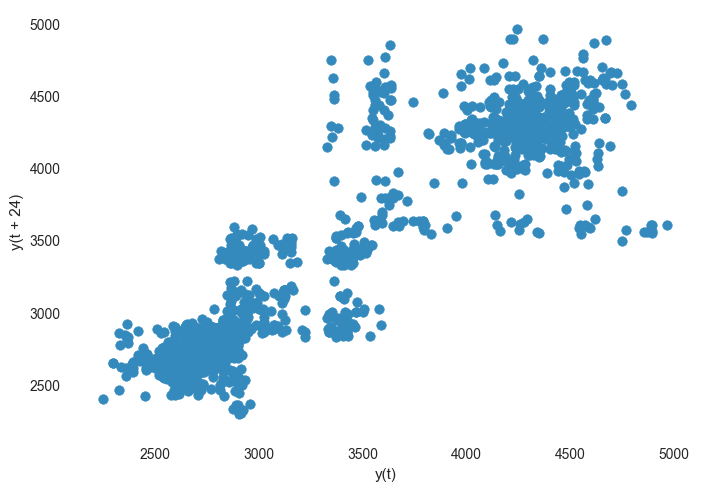

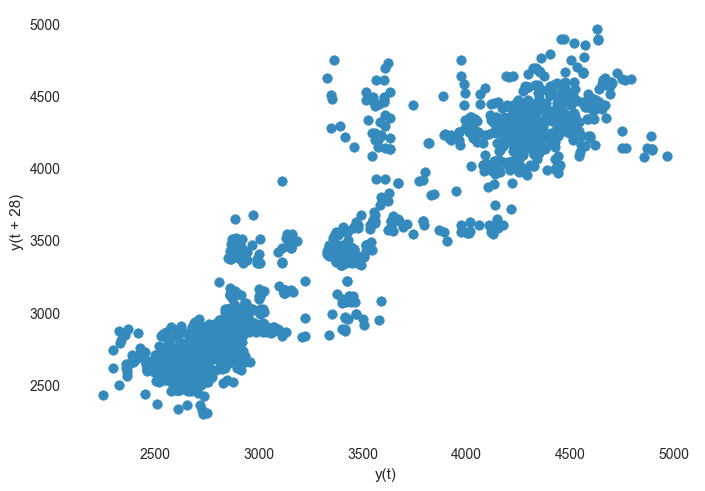

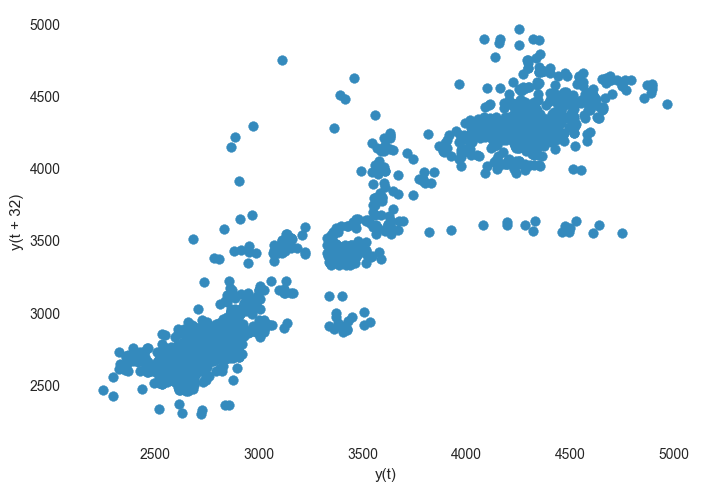

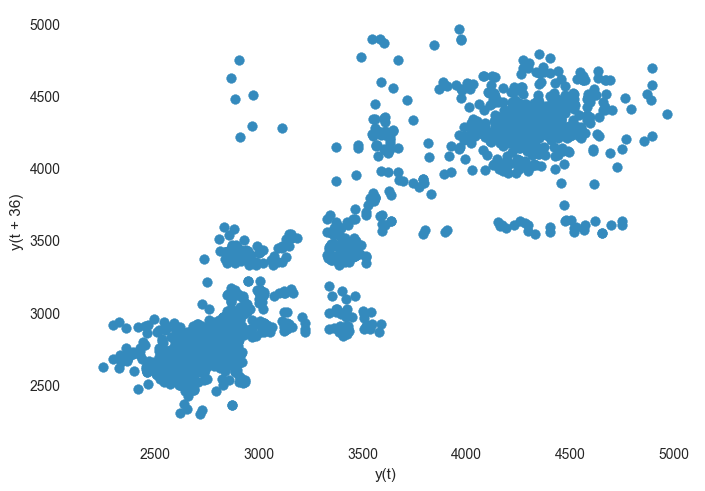

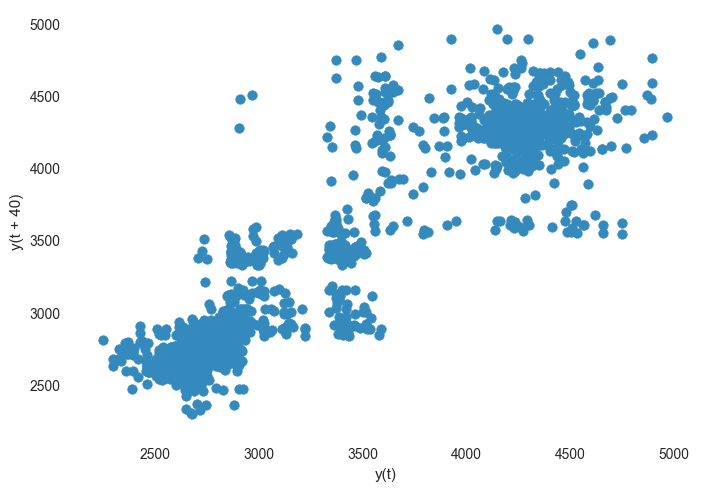

In [62]:
# Lag plot
plt.figure(figsize=(10,5))
for i in [1,4,8,12,16,20,24,28,32,36,40]:
    lag_plot(df.price,lag=i)
    plt.show()

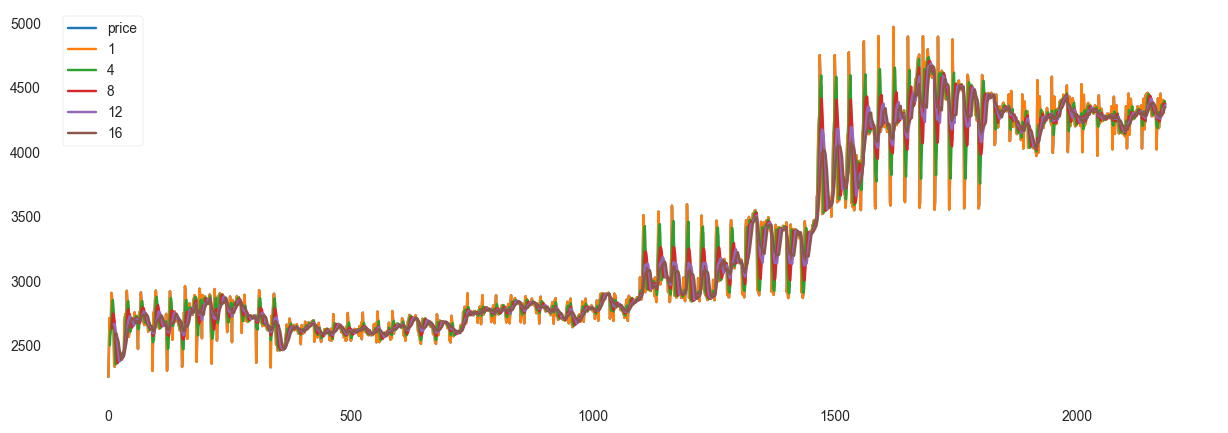

In [63]:
#Moving Average
plt.figure(figsize=(15,5))
df['price'].plot()
for i in [1,4,8,12,16]:
    df['price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [64]:
df1=data.copy()
df1.head()

date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75

In [65]:

df1['date']=pd.to_datetime(df['date'])
df1.set_index('date',inplace=True)
df1.head()

price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75

In [66]:
df1=df1.resample('1M').mean()

In [67]:
df1.head() 

price
date                   
2016-01-31  2495.832258
2016-02-29  2688.703448
2016-03-31  2682.854839
2016-04-30  2677.790000
2016-05-31  2677.650000

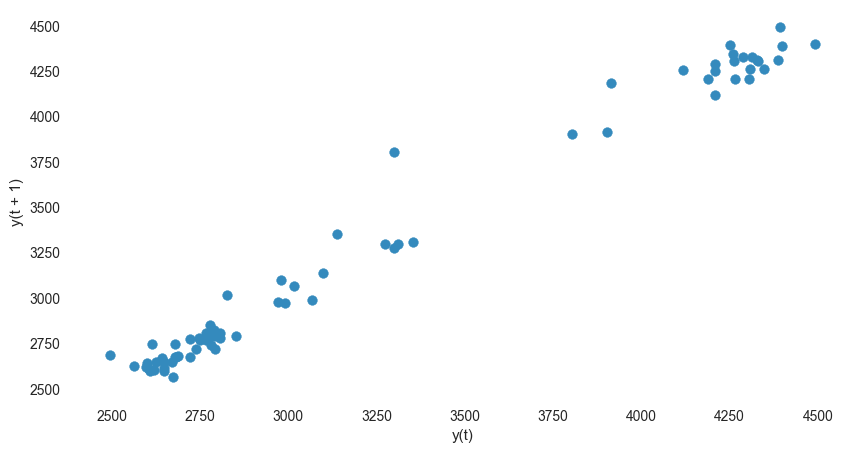

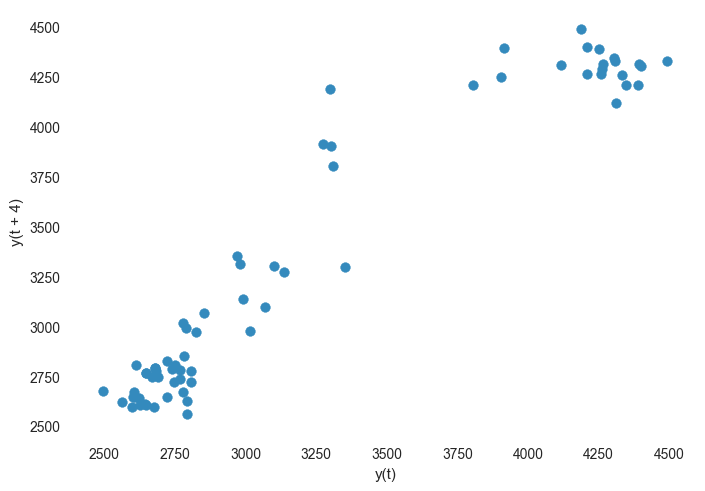

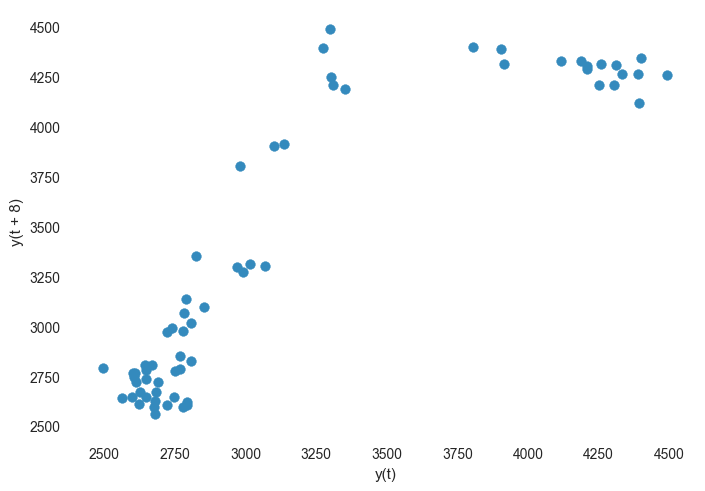

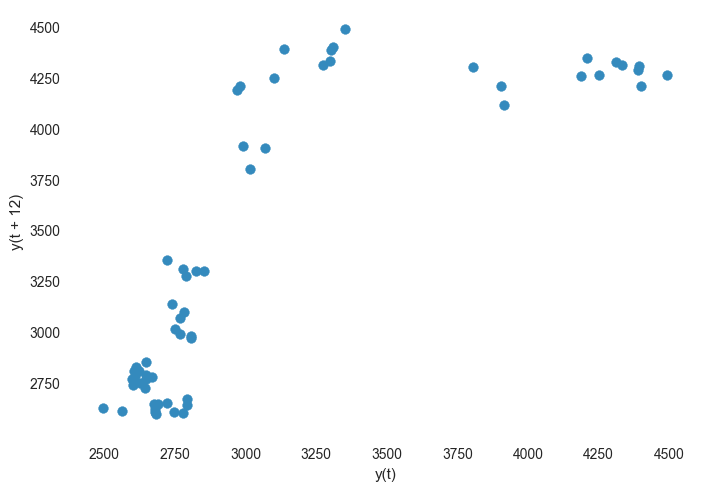

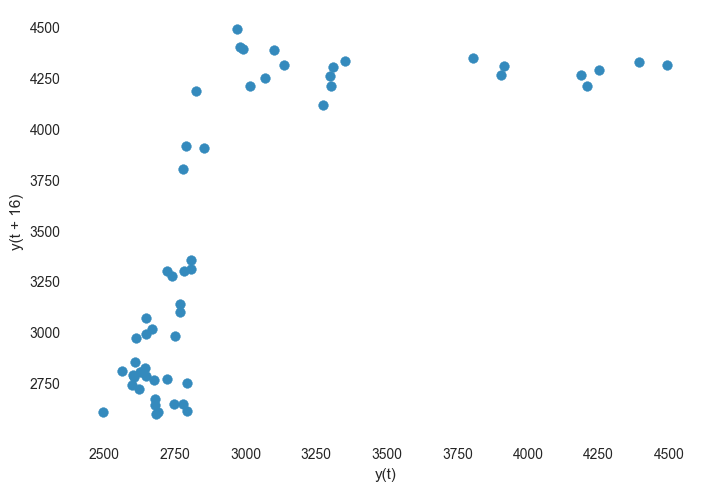

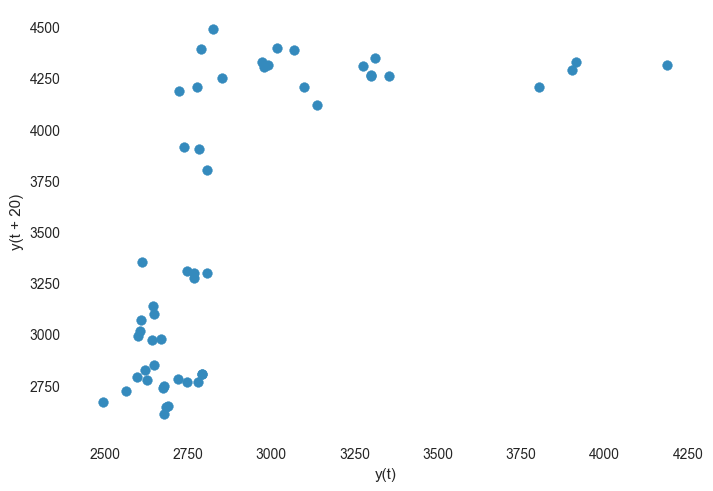

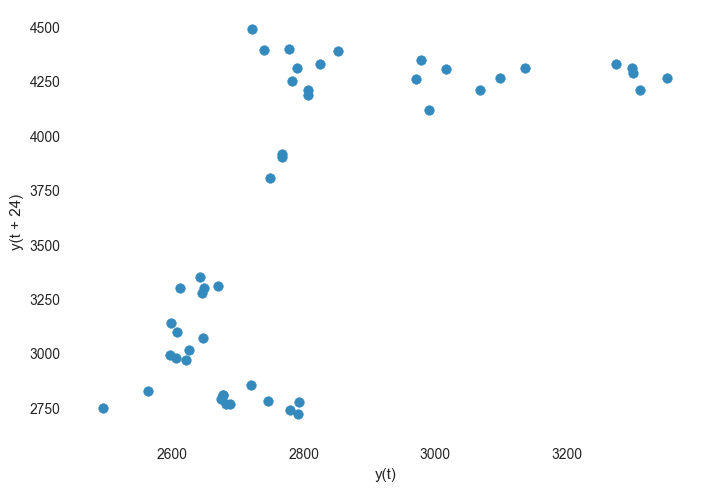

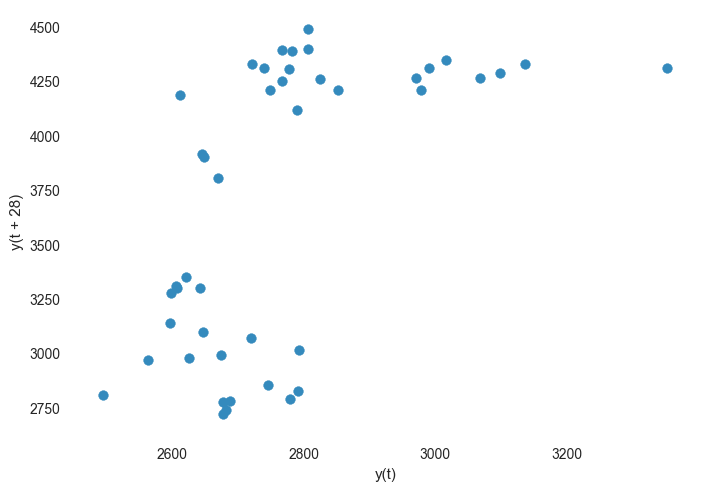

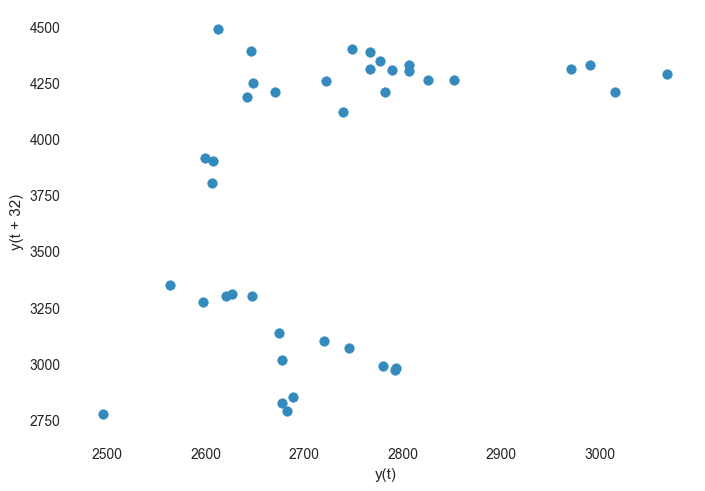

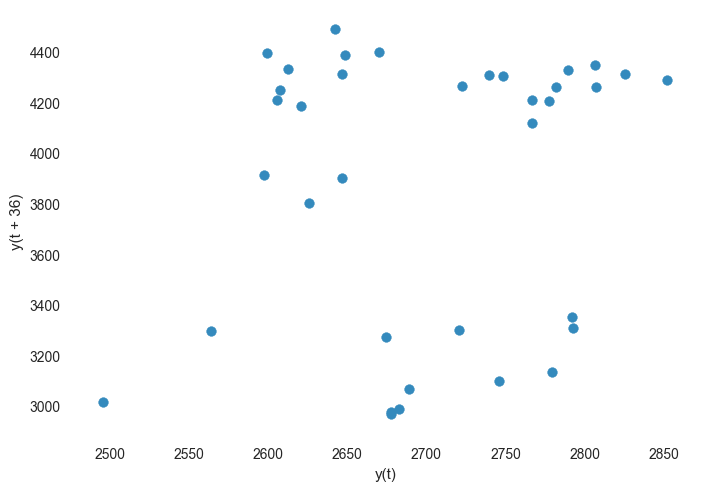

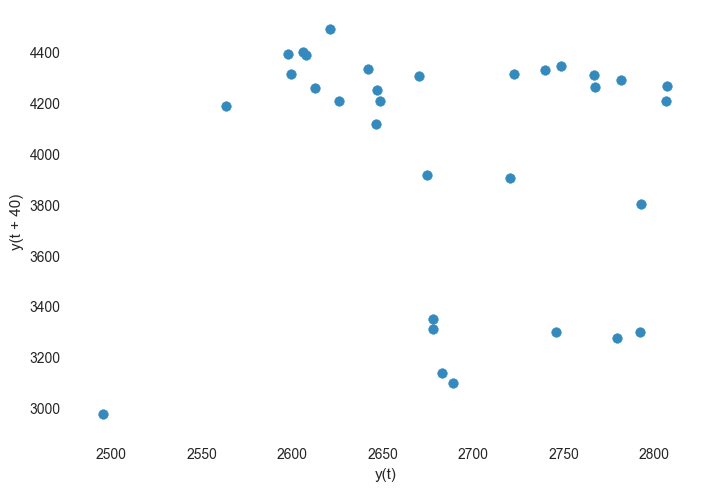

In [68]:
# Lag plot for monthly mean
plt.figure(figsize=(10,5))
for i in [1,4,8,12,16,20,24,28,32,36,40]:
    lag_plot(df1.price,lag=i)
    plt.show()

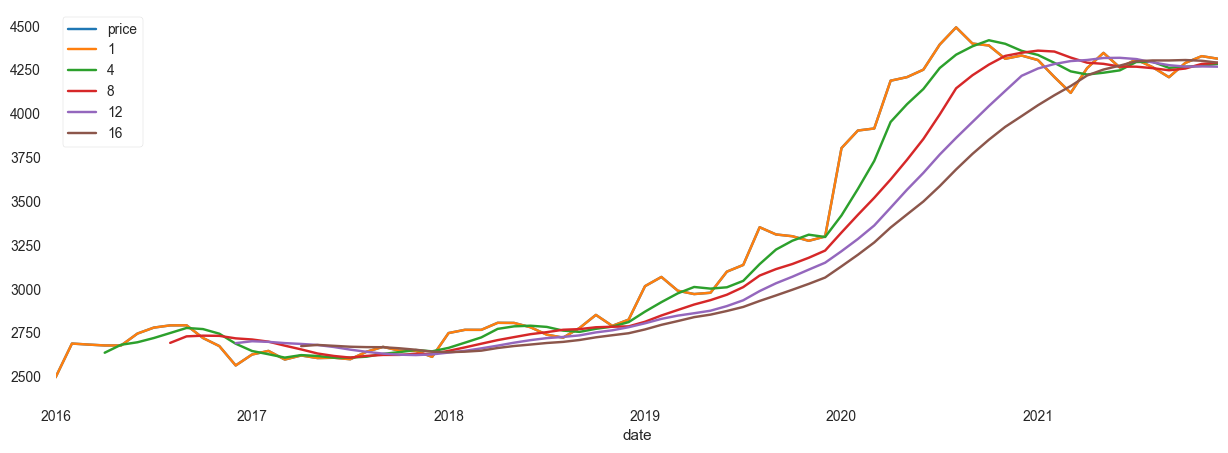

In [75]:
#Moving Average for monthly mean
plt.figure(figsize=(15,5))
df1['price'].plot()
for i in [1,4,8,12,16]:
    
    df1['price'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

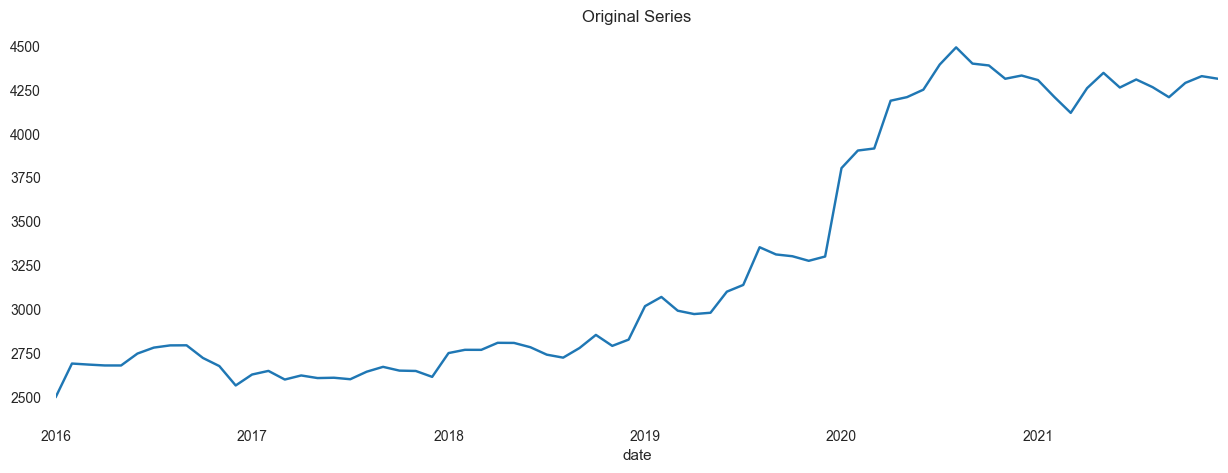

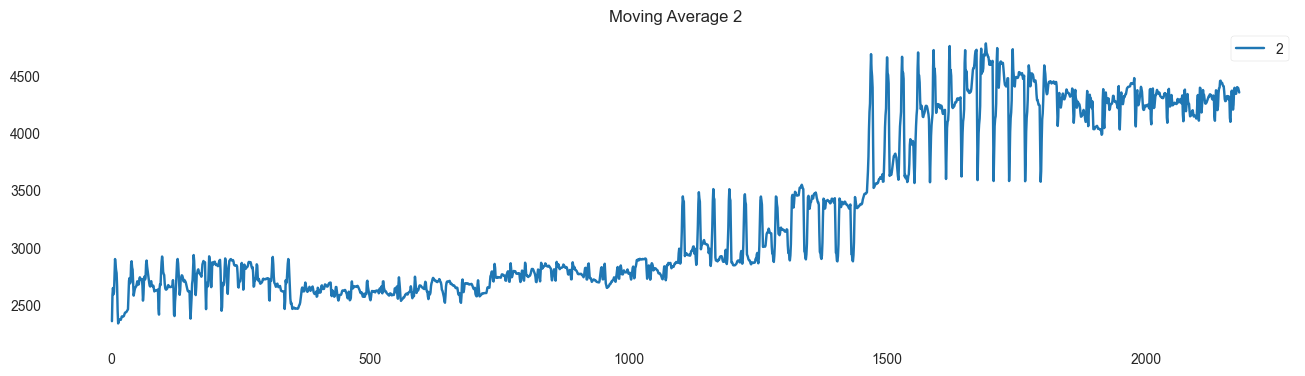

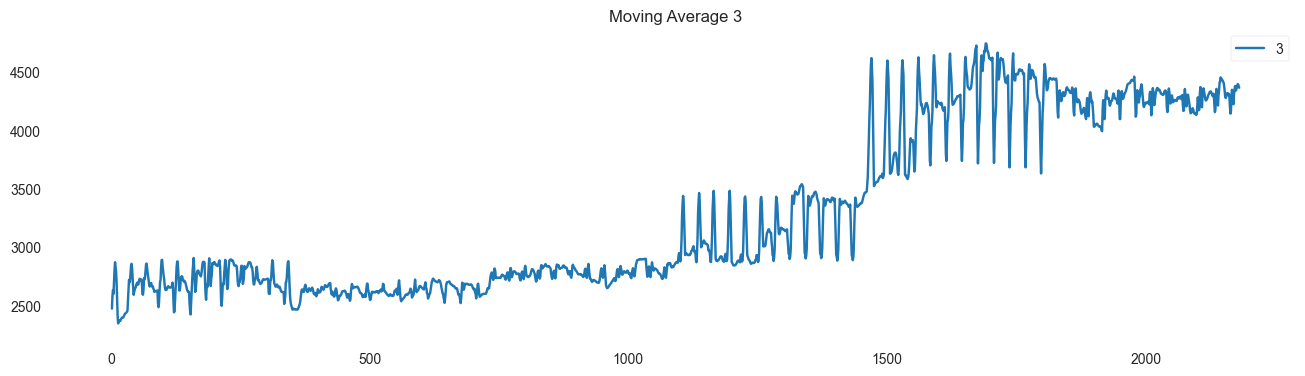

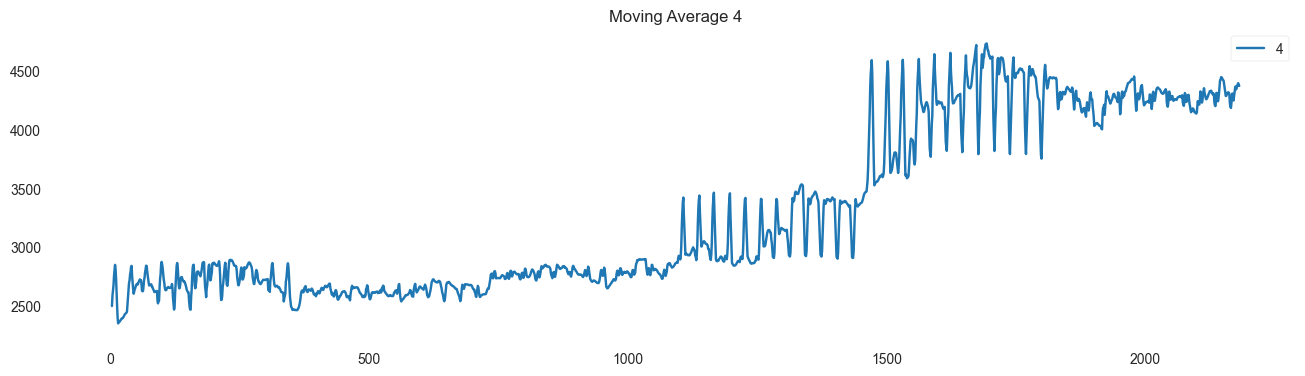

In [77]:
plt.figure(figsize=(15,5))
df1['price'].plot()
plt.title("Original Series")
for i in [2,3,4]:
    plt.figure(figsize=(16,4))
    df["price"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

# Time-Series Decomposition

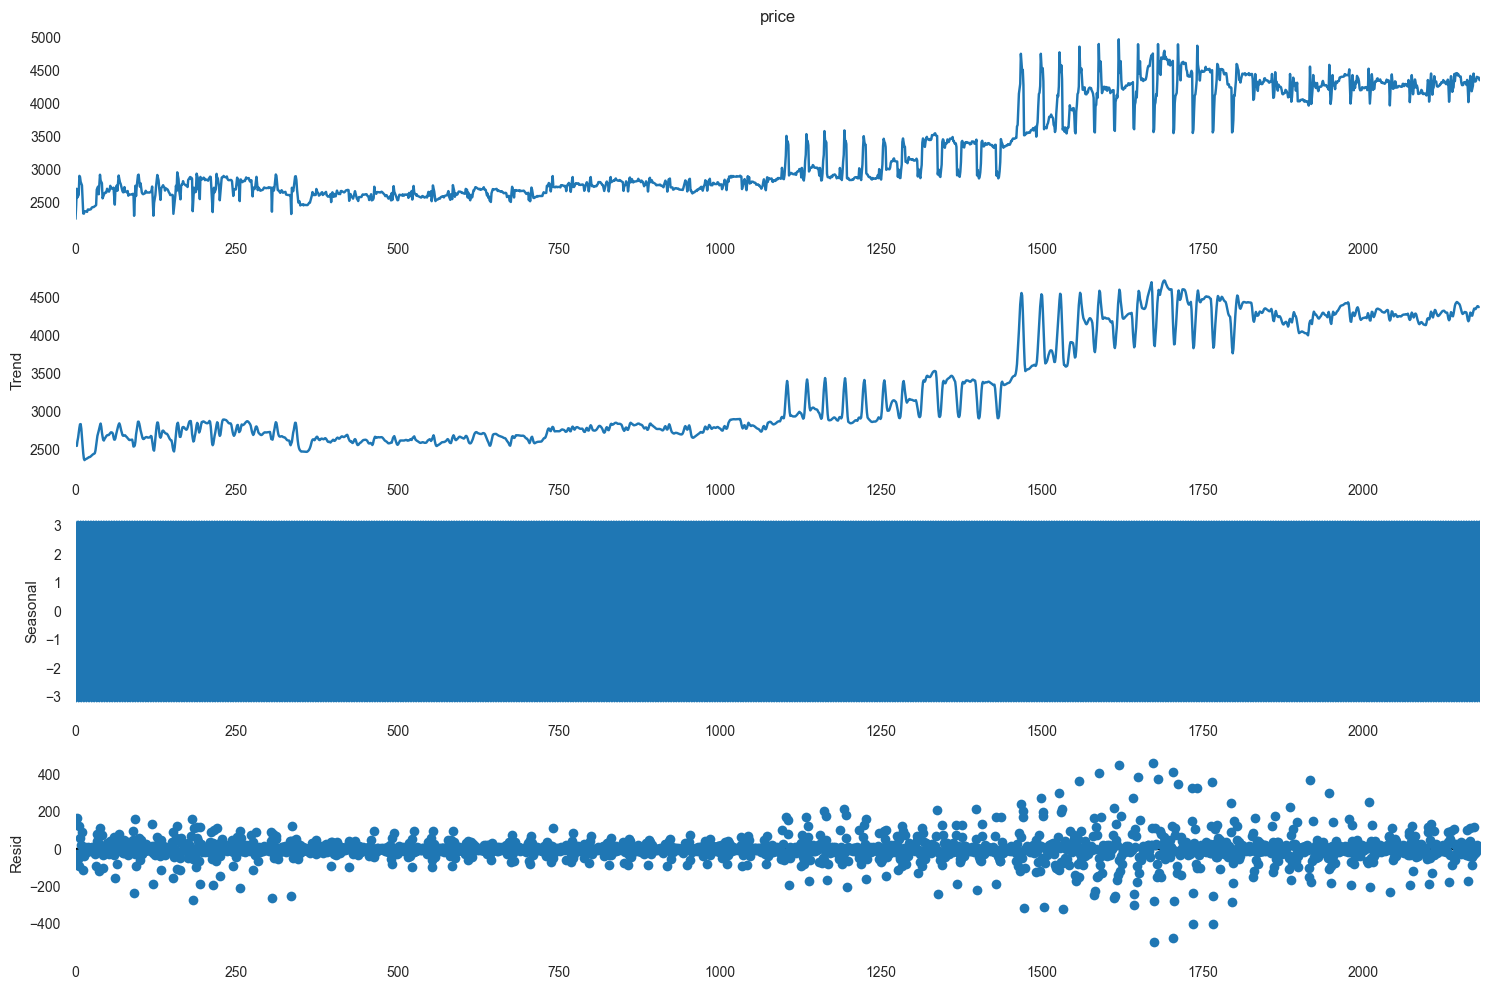

In [76]:
#Time Series decomposition plot
decompose_ts_add=seasonal_decompose(df['price'],period=4)
with plt.rc_context():
    plt.rc('figure',figsize=(15,10))
    decompose_ts_add.plot()
    plt.show()

### Additive Seasonal Decompose

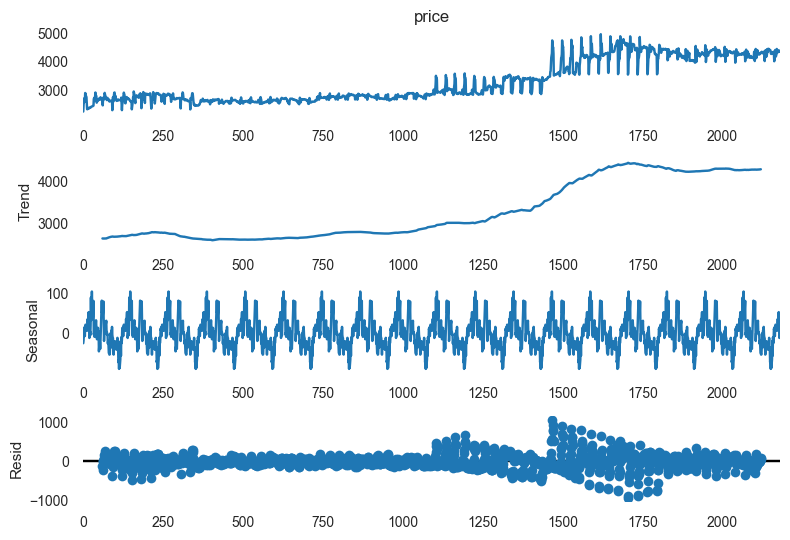

In [82]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive',period=120)
fig = decomposition.plot()
plt.show()

**Analysis:- Observed - Actual data**
- Trend - Increasing or decreasing trend.
- Seasonal - Varies from +0.5 to -0.5 with the mean 0. Each cycle represents each year trend. The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1988 Nov, the seasonal value is +0.5 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 0.5+100 = 100.5

- Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)
## Multiplicative Seasonal Decomposition

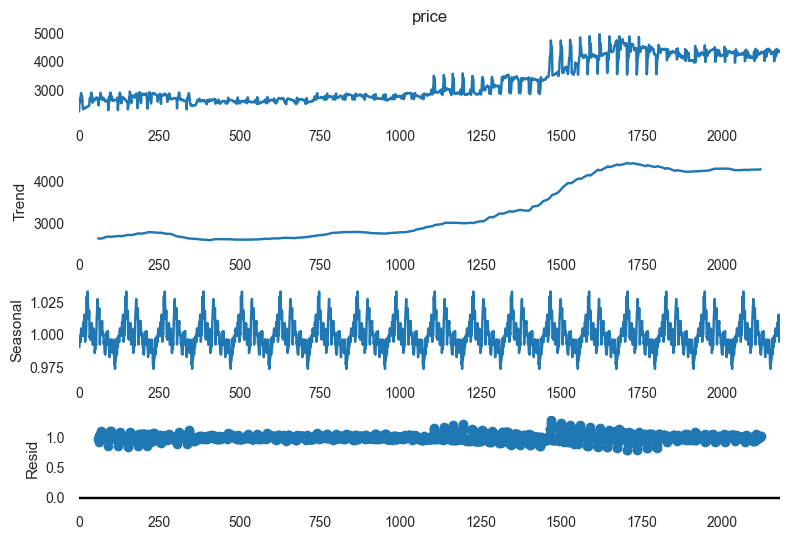

In [83]:
decomposition = sm.tsa.seasonal_decompose(df['price'], model='multiplicative',period=120)
fig = decomposition.plot()
plt.show()

# PACFand ACF plot

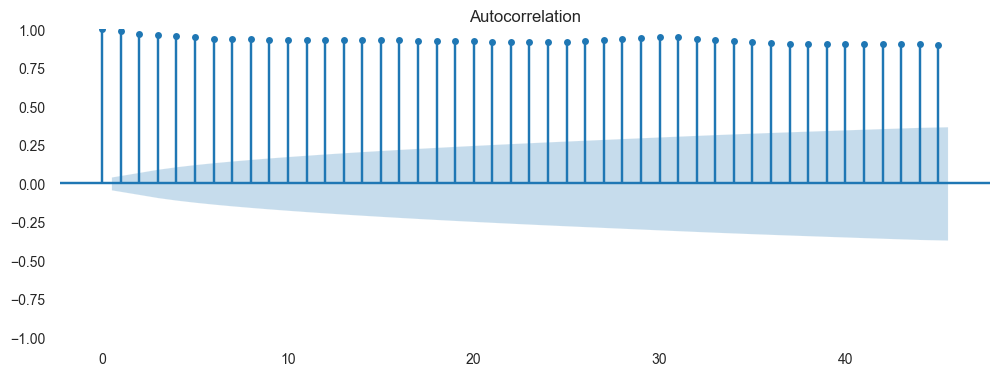

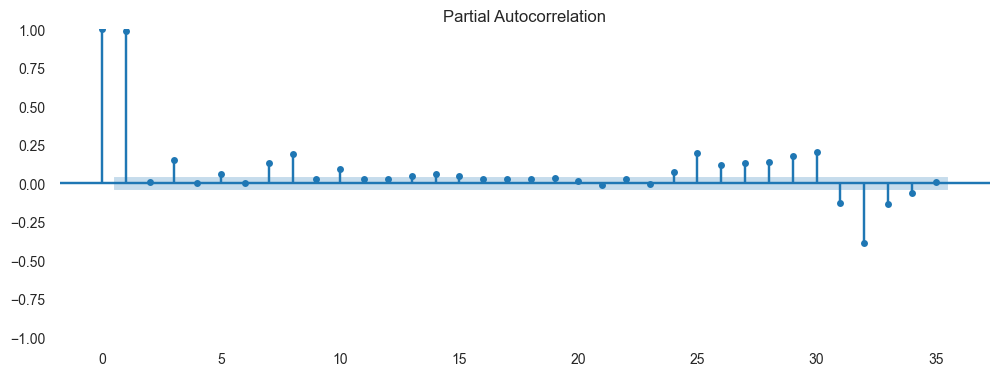

In [80]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.price,lags=45)
    tsa_plots.plot_pacf(df.price,lags=35)
    plt.show()

### Monthwise yearly Price

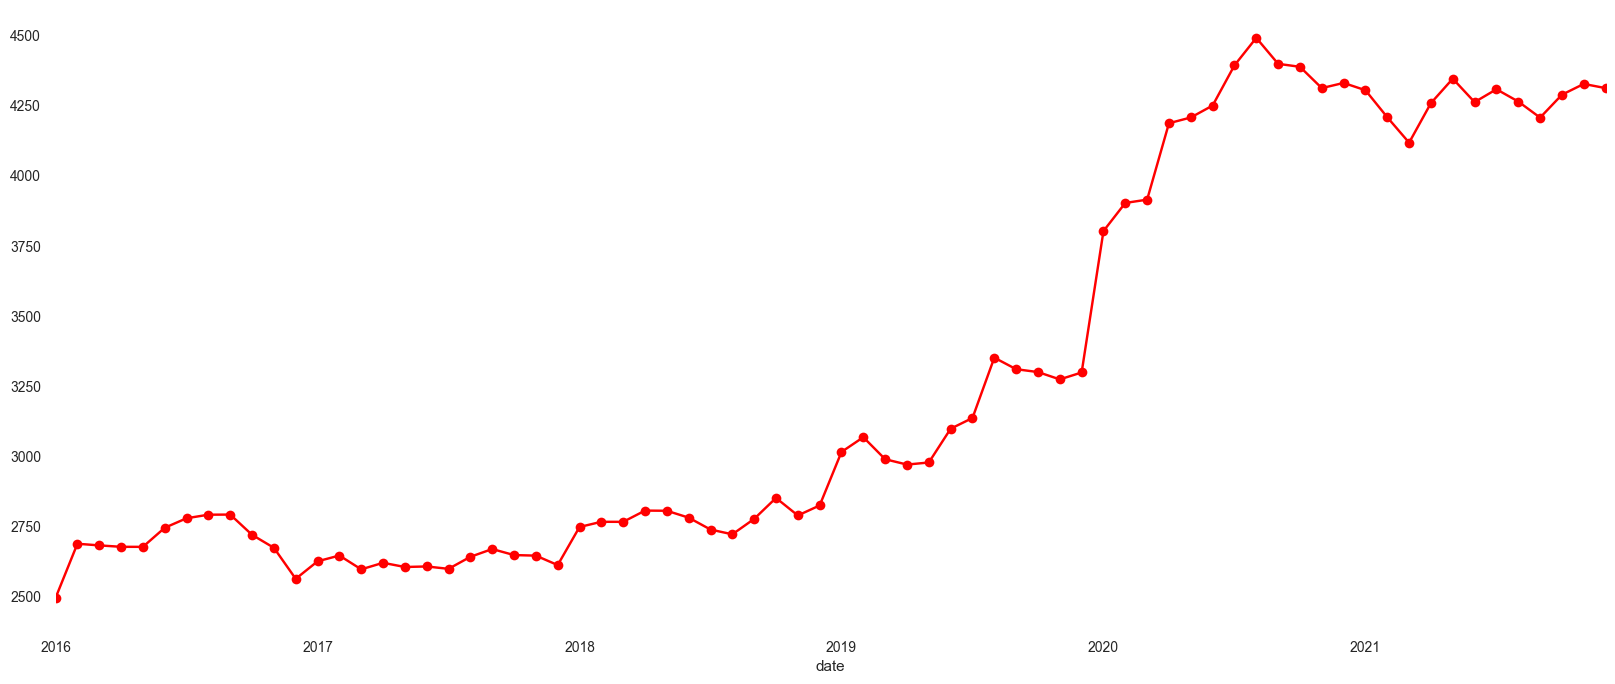

In [81]:
df1['price'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

In [89]:
df_eda=df.copy()
df_eda.set_index('date',inplace=True)
df_eda.tail()

price Month  Year  quarter  dayno day_of_week    change  \
date                                                                   
2021-12-17  4394.4   Dec  2021        4     17      Friday -0.001227   
2021-12-18  4389.5   Dec  2021        4     18    Saturday -0.001115   
2021-12-19  4389.5   Dec  2021        4     19      Sunday  0.000000   
2021-12-20  4354.1   Dec  2021        4     20      Monday -0.008065   
2021-12-21  4346.5   Dec  2021        4     21     Tuesday -0.001745   

            Difference  
date                    
2021-12-17        -5.4  
2021-12-18        -4.9  
2021-12-19         0.0  
2021-12-20       -35.4  
2021-12-21        -7.6

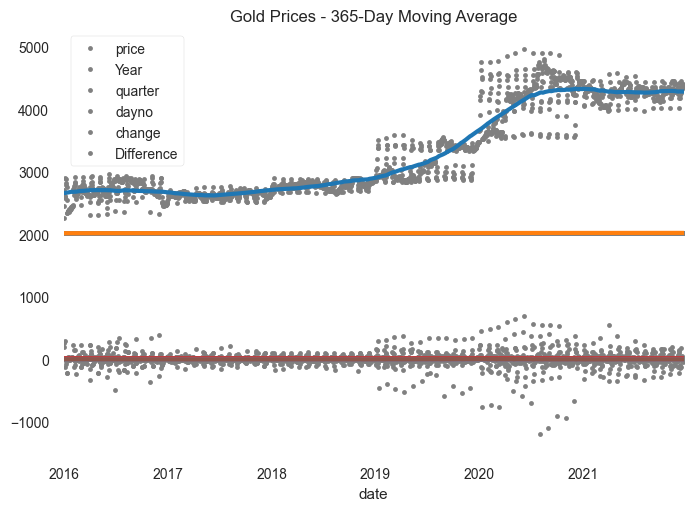

In [88]:
# Visualizing changes in mean over 365 days.
moving_average = df_eda.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df_eda.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Gold Prices - 365-Day Moving Average", legend=False,
);

## Check for Stationary or Non-Stationary Time-series
**1)Augmented Dickey-Fuller (ADF) Test**
- Null Hypothesis (H0): The series is not stationary
p-val > 0.05
- Alternate Hypothesis (H1): The series is stationary
p-val <= 0.05

In [108]:
result=adfuller (df['price'])
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -0.309904
p-value: 0.924090
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


 **Analysis**
- p-value (0.92) > critical value(0.05).
- Failed to reject null hypothesis (The series is not stationary)
- Hence, the time series is Non-Stationary.

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
- Null Hypothesis (H0): The series is stationary

p-val>0.05

- Alternate Hypothesis (H1): The series is not stationary

p-val <= 0.05

In [110]:
from statsmodels.tsa.stattools import kpss
result_kpss_ct=kpss(df['price'],regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 1.284096
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


**Analysis**
- p-val(0.01) < Critical value(0.05) Reject the null hypothesis (The series is stationary)
- Hence, as per alternate hypothesis the time series is non stationary
## Converting Non-Stationary to Stationary Time Series
To make our Data Stationary We apply Some Methods
-**Transformation**
- i) Log Tranformation
- ii) Square root Transformation
- iii) Log Differencing Method
- iv) Square root differencing

**i) Log transforming of the data**

In [120]:
df_log=np.log(df['price'])
df_diff=df_log.diff().dropna()
df_compare=df_log
df_log.head()

0    7.719840
1    7.805678
2    7.904003
3    7.854692
4    7.862401
Name: price, dtype: float64

In [134]:
df_log.shape

(2182,)

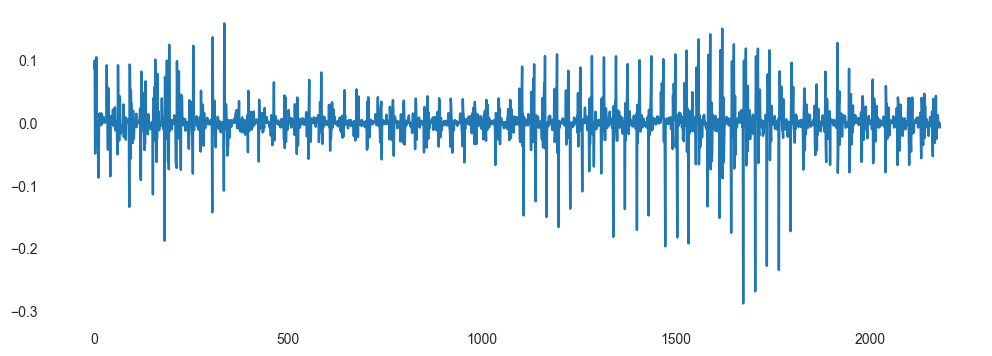

In [114]:
df_diff.plot(figsize=(12,4))
plt.show()

In [115]:
# using ADF test
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -21.394232
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


**Analysis:**

- Test Statistic > Critical Value and
- p-value < 0.05.

In [116]:
# Using KPSS Test
result_kpss_ct_log=kpss(df_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.030000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


**Analysis**
- Test Statistic > Critical Value and p-value < 0.05.
- here looks Reversed 0.020000 < 0.146 and 0.100000 < 0.05
- From this we conclude that our data is stationary.

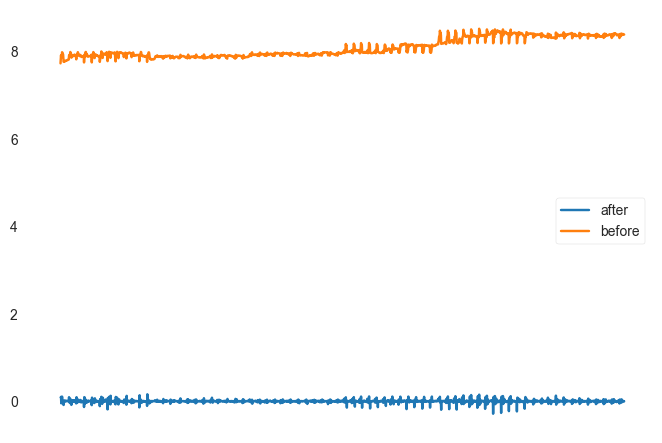

In [119]:
# Comparing both test Before Transformation and After Transformation
plt.plot(df_diff,label="after")
plt.plot(df_compare,label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 

In [121]:
# To find information of maximum price
df[df['date']=='2020-12-01']

date   price
1796 2020-12-01  3559.6

In [138]:
size = 1796
train_data = df[:size]
test_data = df[size:]

In [136]:
print(train_data.shape)
print(test_data.shape)

(1796,)
(386,)


In [125]:
# Evaluation metric
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential

In [139]:
# Simple exponential
ses_model = SimpleExpSmoothing(train_data['price']).fit(optimized=True)
test_pred_ses = ses_model.forecast(386)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.price))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.price)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 2.5223958382618314 
 Train Root Mean Squared Error = 115.20304476991518 
 Test Root Mean Squared Error = 138.04955467875388


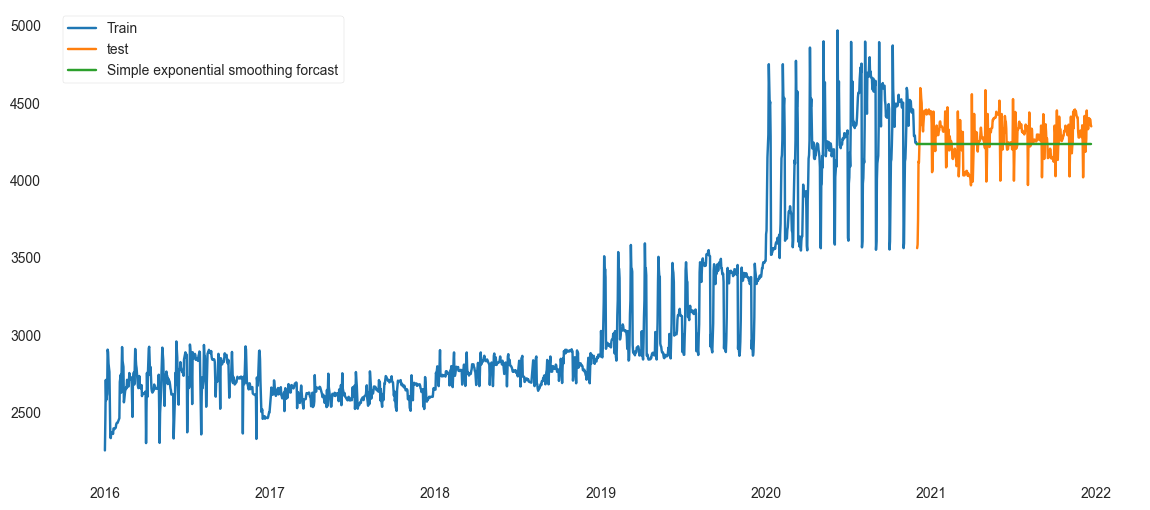

In [140]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [141]:
# double exponential
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(386)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.price))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.price)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 16.40132855817668 
 Train Root Mean Squared Error = 116.59936085372401 
 Test Root Mean Squared Error = 803.8697060446814


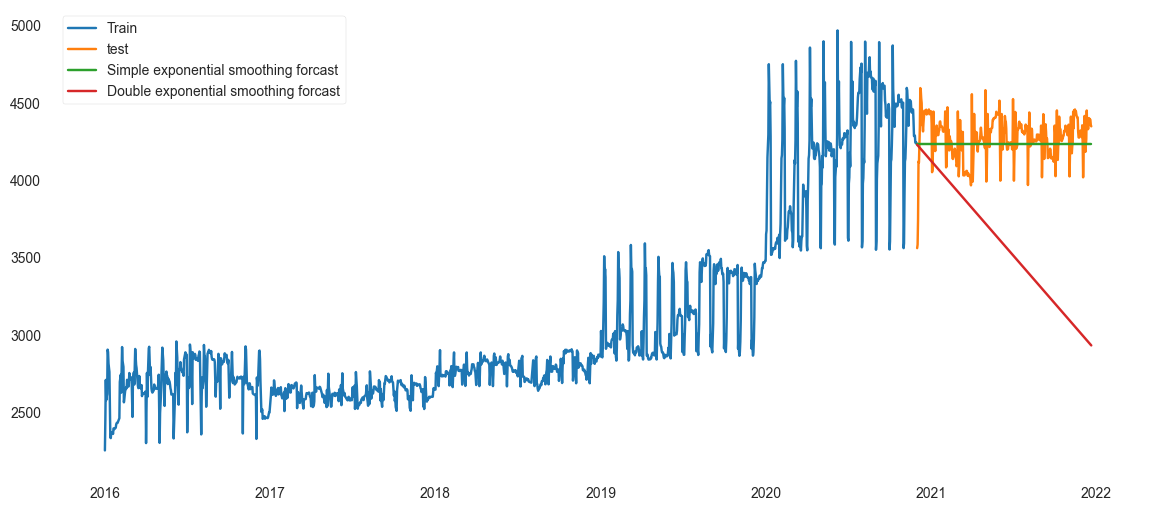

In [142]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
- Captures Level, Trend and Seasonality.

In [143]:
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(386)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.price))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.price)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 25.635741994559115 
 Train Root Mean Squared Error = 119.81803989805884 
 Test Root Mean Squared Error = 1257.6572628747163


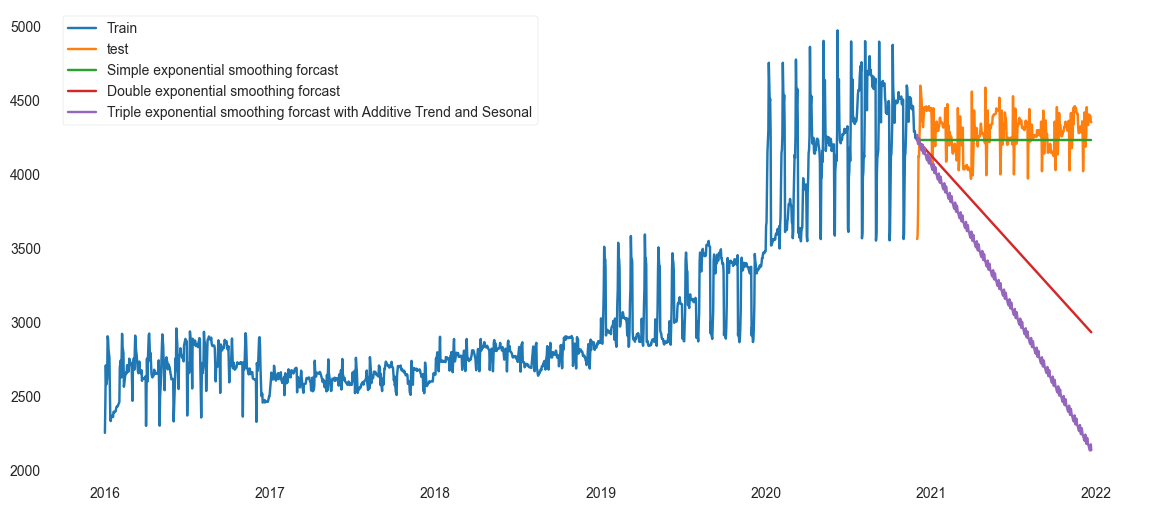

In [144]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

## Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)


In [145]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(386)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.price))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.price)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 23.43325124688234 
 Train Root Mean Squared Error = 119.66333664671131 
 Test Root Mean Squared Error = 1148.7125411156826


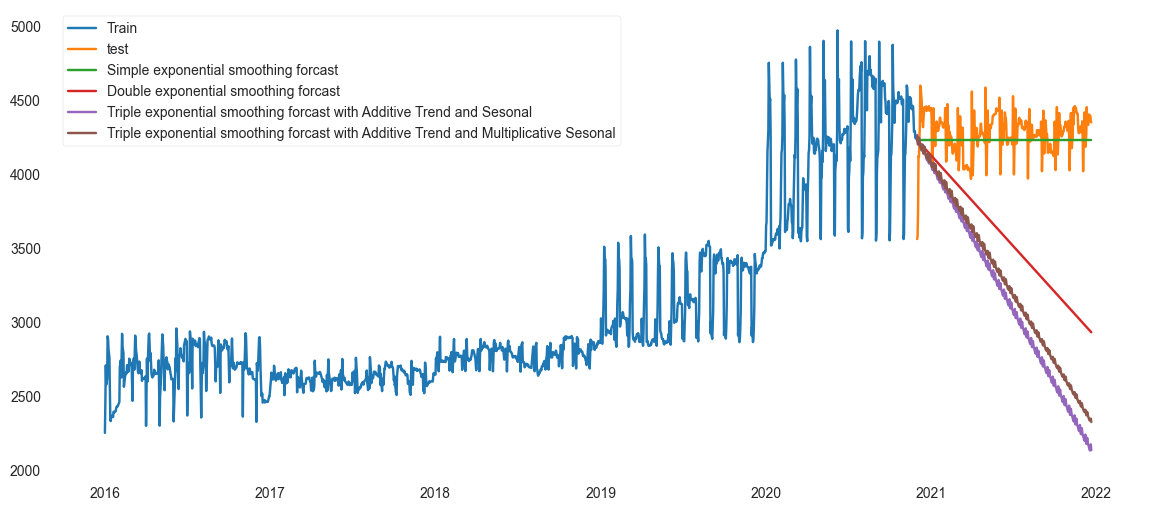

In [146]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

In [147]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(386)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.price))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.price)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 87.65693990914785 
 Train Root Mean Squared Error = 253.67314120595495 
 Test Root Mean Squared Error = 3859.4902009526213


### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [60]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(12)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.price))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.price)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 21.257821218608765 
 Train Root Mean Squared Error = 69.8490282769819 
 Test Root Mean Squared Error = 938.2370800878381


In [62]:
#Comparing the results 

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0         Simple_Exp  100.672224      1.569083         88.211053
1         Double_Exp   99.426612      4.154289        189.015483
2      Triple_Exp_ad   69.650663     14.186418        623.602994
3  Triple_Exp_mul_ad   64.132985     17.866573        778.210121
4     Triple_Exp_mul   69.849028     21.257821        938.237080
5  Triple_Exp_ad_mul  169.089808     33.143073       1457.233757

In [81]:
from prophet import Prophet

In [82]:
p = Prophet(interval_width=0.92, daily_seasonality=True)

cmd: where.exe tbb.dll
cwd: None
Adding TBB (C:\Users\DELL\anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH


In [92]:
df2=data.copy()
df2.dtypes

date      object
price    float64
dtype: object

In [93]:
df2

date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]

In [95]:
df2.columns = ['ds', 'y']
df2.head()

ds        y
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75

In [96]:
model = p.fit(df2)

input tempfile: C:\Users\DELL\AppData\Local\Temp\tmp_nbho6gh\8r_x5hrd.json
input tempfile: C:\Users\DELL\AppData\Local\Temp\tmp_nbho6gh\bcz16_pf.json
idx 0
running CmdStan, num_threads: None
CmdStan args: ['C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=98045', 'data', 'file=C:\\Users\\DELL\\AppData\\Local\\Temp\\tmp_nbho6gh\\8r_x5hrd.json', 'init=C:\\Users\\DELL\\AppData\\Local\\Temp\\tmp_nbho6gh\\bcz16_pf.json', 'output', 'file=C:\\Users\\DELL\\AppData\\Local\\Temp\\tmp_nbho6gh\\prophet_modelh64_sb4a\\prophet_model-20221229161808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:18:08 - cmdstanpy - INFO - Chain [1] start processing
Chain [1] start processing
16:18:09 - cmdstanpy - INFO - Chain [1] done processing
Chain [1] done processing


In [98]:
forecast_prediction = p.predict(df2)
forecast_prediction.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
2177 2021-12-17  3977.814634  3892.923192  4461.713829  3977.814634   
2178 2021-12-18  3977.595428  3895.942193  4482.641934  3977.595428   
2179 2021-12-19  3977.376222  3891.346290  4476.840782  3977.376222   
2180 2021-12-20  3977.157016  3909.209941  4482.975121  3977.157016   
2181 2021-12-21  3976.937809  3897.142372  4499.428009  3976.937809   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
2177  3977.814634      186.297910            186.297910            186.297910   
2178  3977.595428      198.348624            198.348624            198.348624   
2179  3977.376222      203.706842            203.706842            203.706842   
2180  3977.157016      213.796553            213.796553            213.796553   
2181  3976.937809      223.776209            223.776209            223.776209   

           daily  ...    weekly  weekly_lower  weekly_upper     yearly  \
2177  276.048806  ... -3.694853     -3.694853     -3.694853 -86.056042   
2178  276.048806  ...  1.161941      1.161941      1.161941 -78.862123   
2179  276.048806  ... -1.389081     -1.389081     -1.389081 -70.952883   
2180  276.048806  ...  0.189236      0.189236      0.189236 -62.441489   
2181  276.048806  ...  1.180915      1.180915      1.180915 -53.453512   

      yearly_lower  yearly_upper  multiplicative_terms  \
2177    -86.056042    -86.056042                   0.0   
2178    -78.862123    -78.862123                   0.0   
2179    -70.952883    -70.952883                   0.0   
2180    -62.441489    -62.441489                   0.0   
2181    -53.453512    -53.453512                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
2177                         0.0                         0.0  4164.112544  
2178                         0.0                         0.0  4175.944052  
2179                         0.0                         0.0  4181.083063  
2180                         0.0                         0.0  4190.953568  
2181                         0.0                         0.0  4200.714018  

[5 rows x 22 columns]

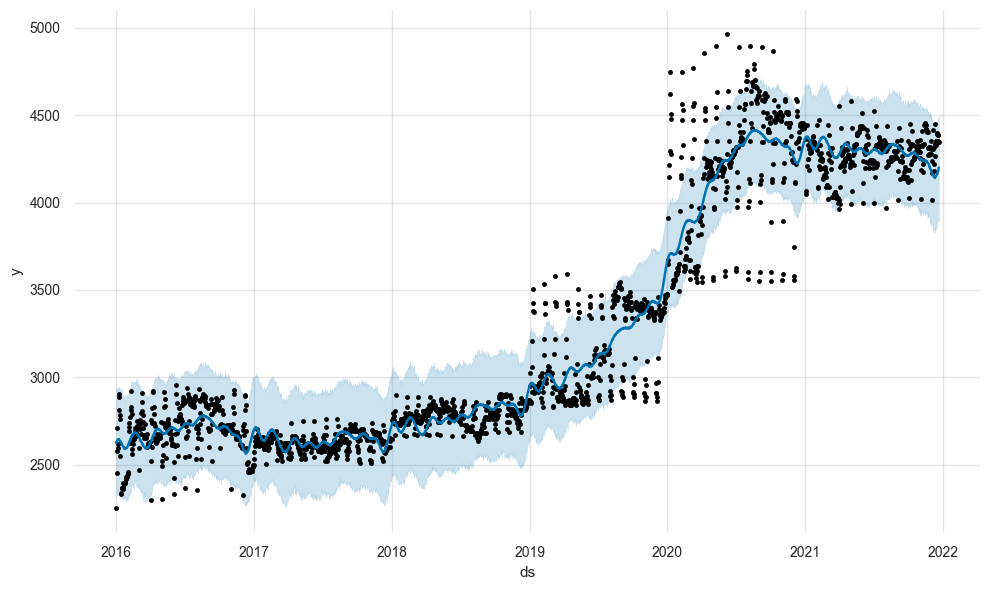

In [99]:
plot1 = p.plot(forecast_prediction)

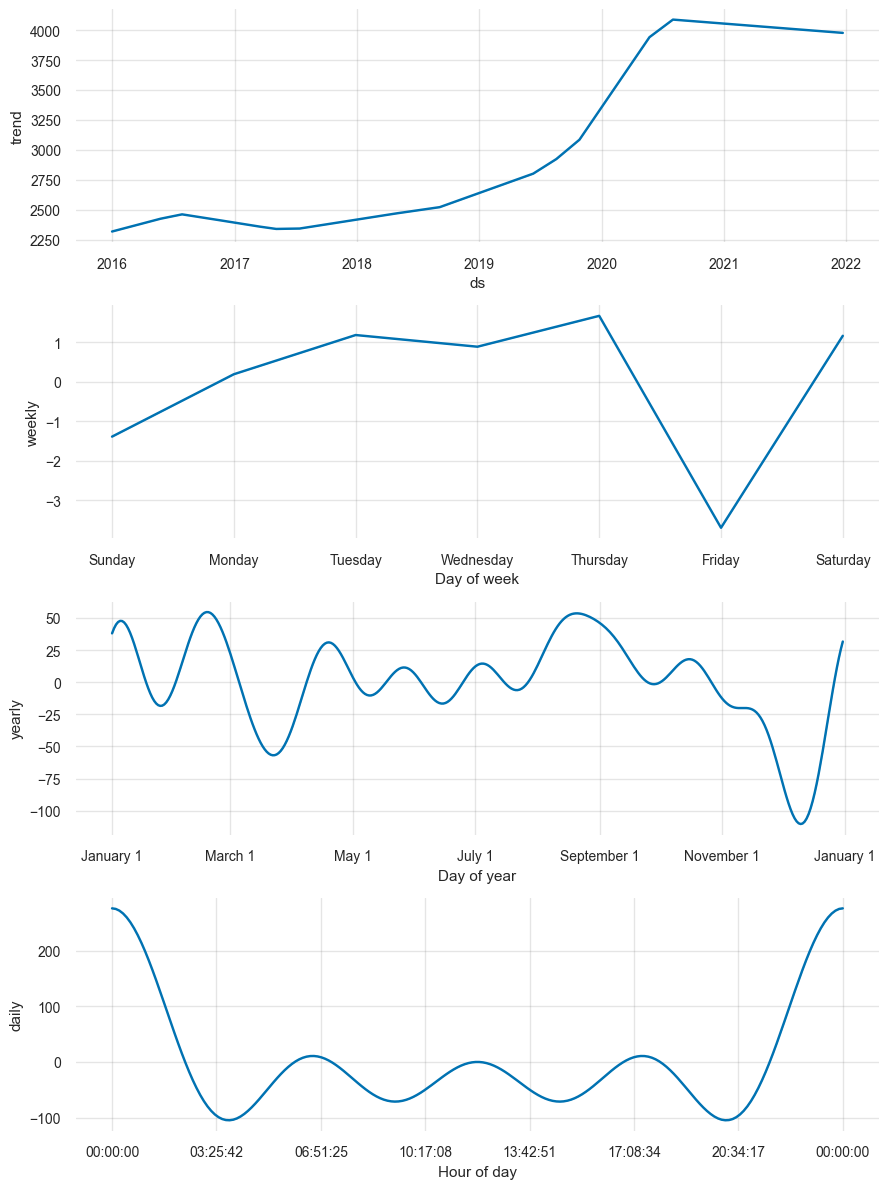

In [100]:
plot2 = p.plot_components(forecast_prediction)

          ds         yhat   yhat_lower   yhat_upper
0 2016-01-01  2623.529909  2309.708416  2933.412261
1 2016-01-02  2633.844867  2347.400026  2919.668756
2 2016-01-03  2635.754366  2330.767781  2938.466452
3 2016-01-04  2640.767693  2329.349603  2928.670571
4 2016-01-05  2644.161544  2324.856255  2930.250357


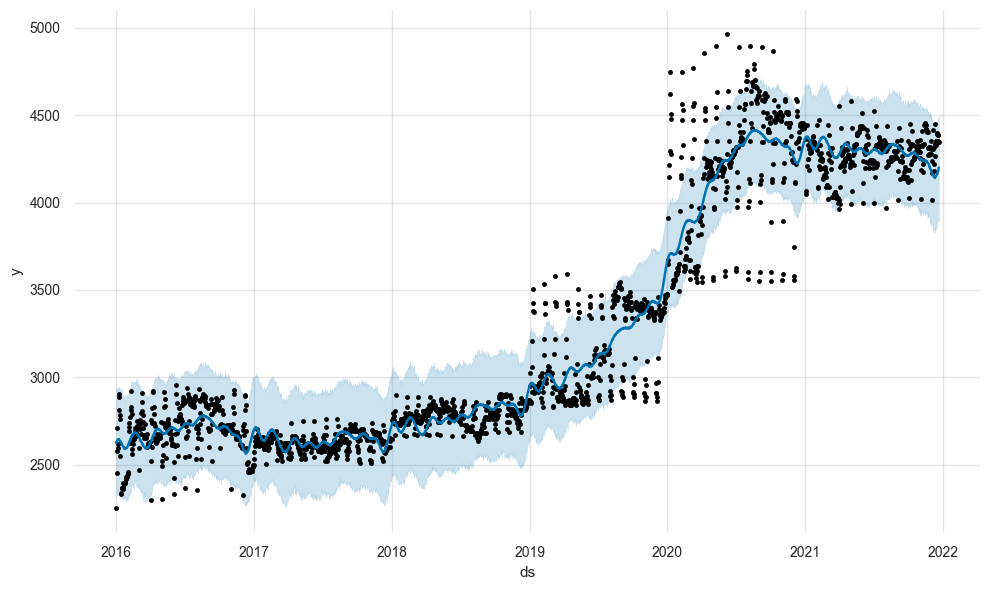

In [101]:
print(forecast_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast_prediction)
plt.show()

In [102]:
future1 = p.make_future_dataframe(periods=30)

In [103]:
forecast1 = p.predict(future1)

In [104]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2207 2022-01-16  4256.693519  3959.640478  4556.320677
2208 2022-01-17  4252.981836  3973.504597  4545.593237
2209 2022-01-18  4248.927098  3954.126250  4552.562748
2210 2022-01-19  4243.939479  3961.560055  4528.231587
2211 2022-01-20  4240.481930  3945.477236  4525.675511

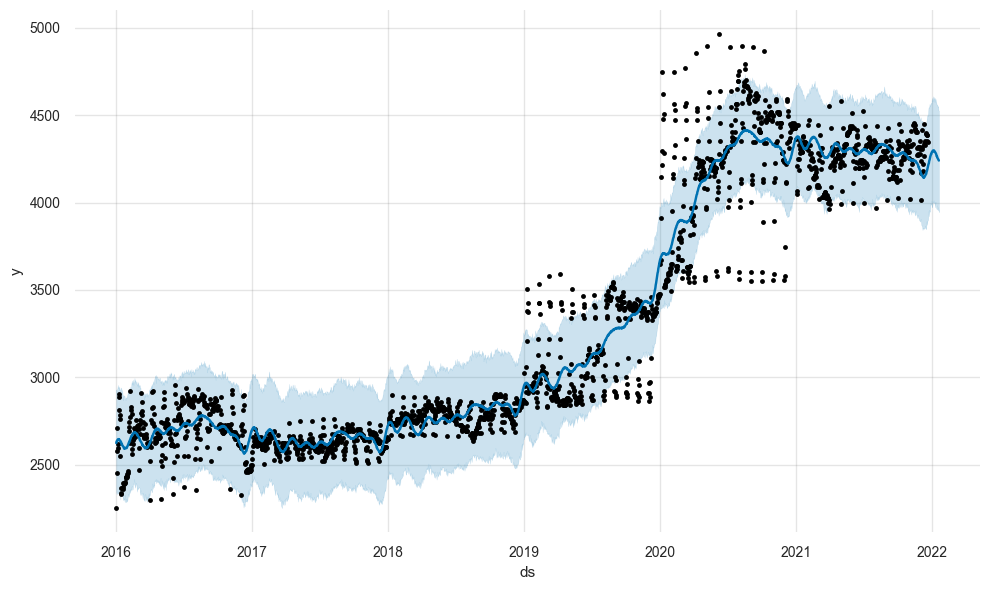

In [105]:
p.plot(forecast1);

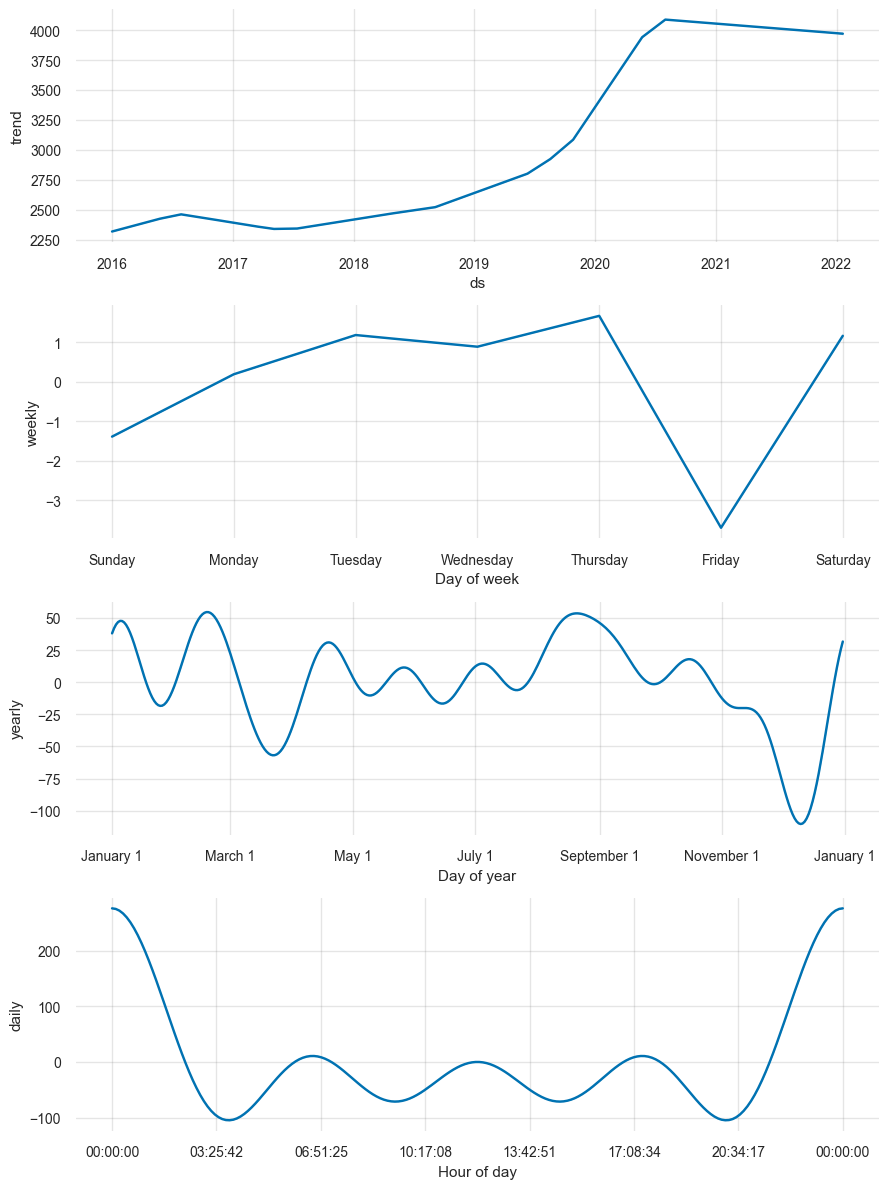

In [106]:
p.plot_components(forecast1);

Conclusion
So, this is how one can use the Fbprophet library to easily predict future time series data without wasting much time on tuning the model. There is also a provision to perform cross-validation with the help of the Prophet library which helps in increasing the accuracy of predictions.